<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/018_google_trends_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.19 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Collect Google Trends Data (2013-2022)**

### Contents

1. Input Data*
2. Get Keywords*
3. Create Timeframes
  *  3.1 營收公告日（每月10日）前後
  *  3.2 Year
  *  3.3 各公司營收公告日前後 15 日*
  *  3.4 Create Index*
4. Unofficial API for Google Trends - pytrends
  *  4.0 Setup
  *  4.1 Get Reports from Google Trends
  *  4.2 One Month Before and After the Announcement of Each Month
      *  Functions
      *  Scrape 10 Keywords at a Time
      *  Scrape Trends Across Multiple Time Ranges for All the Companies
  *  4.3 Trends for Each Year
5. Read Saved Trends*
  *  5.0 Setup
  *  5.1 Monthly Trends
      *  Class & Methods
      *  Individual Company (e.g. 2330 台積電)
      *  All the Companies


2023.06.02 Modified for real announcement date for each company.

## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

### **Project Path**

In [3]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data***

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [4]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [5]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


## **2. Get Keywords***


In [6]:
# Company list
company_list = org_data.index
company_list

Index(['1101 台泥', '1102 亞泥', '1103 嘉泥', '1104 環泥', '1108 幸福', '1109 信大',
       '1110 東泥', '1201 味全', '1203 味王', '1210 大成',
       ...
       '9943 好樂迪', '9944 新麗', '9945 潤泰新', '9949 琉園', '9950 萬國通', '9951 皇田',
       '9955 佳龍', '9958 世紀鋼', '9960 邁達康', '9962 有益'],
      dtype='object', name='公司', length=1240)

In [7]:
# Keyword list (without company id)
keyword_list = [s.split(" ")[1] for s in company_list]
print(len(keyword_list))
print(keyword_list)

1240
['台泥', '亞泥', '嘉泥', '環泥', '幸福', '信大', '東泥', '味全', '味王', '大成', '大飲', '卜蜂', '統一', '愛之味', '泰山', '福壽', '台榮', '福懋油', '佳格', '聯華', '聯華食', '大統益', '天仁', '黑松', '興泰', '宏亞', '安心', '德麥', '台塑', '南亞', '台聚', '華夏', '三芳', '亞聚', '台達化', '台苯', '國喬', '聯成', '中石化', '達新', '東陽', '大洋', '永裕', '地球', '恒大', '台化', '台翰', '昭輝', '遠東新', '新纖', '南染', '宏洲', '東和', '廣豐', '嘉裕', '東華', '新紡', '利華', '大魯閣', '福懋', '中福', '勤益控', '雋揚', '南紡', '大東', '立益物流', '力麗', '大宇', '宏和', '力鵬', '佳和', '年興', '宏益', '台富', '集盛', '宜進', '聯發', '宏遠', '強盛', '得力', '偉全', '聚隆', '南緯', '昶和', '大統新創', '首利', '三洋實業', '台南', '弘裕', '業旺', '儒鴻', '聚陽', '士電', '東元', '正道', '瑞利', '中興電', '亞力', '力山', '利奇', '華城', '大億', '堤維西', '耿鼎', '江申', '日馳', '鑽全', '恩德', '樂事綠能', '亞崴', '高林股', '勤美', '車王電', '中宇', '和大', '廣隆', '正峰', '巨庭', '喬福', '錩泰', '伸興', '中砂', '倉佑', '濱川', '力肯', '新麥', '信錦', '程泰', '精剛', '和勤', '吉茂', '川寶', '直得', '宏佳騰', '華電', '聲寶', '華新', '華榮', '大亞', '中電', '宏泰', '三洋電', '大山', '億泰', '榮星', '合機', '南僑', '東鹼', '和益', '東聯', '永光', '興農', '國化', '和桐', '長興', '中纖', '三晃', '台肥', '中碳', '元禎', '永記', '中華化'

## **3. Create Timeframes**


### **3.1 營收公告日（每月10日）前後**

In [8]:
# # 每月10日
# timeframe_month_list = []
# for i in range(2013, 2023, 1):
#     for j in range(1, 13, 1):
#         if ([i, j] != [2013, 1]):
#             if j <= 1:
#                 timeframe_month_list.append(f'{i-1}-12-10 {i}-0{j+1}-10')
#             elif j < 9:
#                 timeframe_month_list.append(f'{i}-0{j-1}-10 {i}-0{j+1}-10')
#             elif j < 11:
#                 timeframe_month_list.append(f'{i}-0{j-1}-10 {i}-{j+1}-10')
#             elif j < 12:
#                 timeframe_month_list.append(f'{i}-{j-1}-10 {i}-{j+1}-10')
#             else:
#                 timeframe_month_list.append(f'{i}-{j-1}-10 {i+1}-01-10')
# timeframe_month_list.append(f'2022-12-10 2023-02-10')

# if len(timeframe_month_list) == org_data.shape[1]:
#     display(timeframe_month_list)

['2013-01-10 2013-03-10',
 '2013-02-10 2013-04-10',
 '2013-03-10 2013-05-10',
 '2013-04-10 2013-06-10',
 '2013-05-10 2013-07-10',
 '2013-06-10 2013-08-10',
 '2013-07-10 2013-09-10',
 '2013-08-10 2013-10-10',
 '2013-09-10 2013-11-10',
 '2013-10-10 2013-12-10',
 '2013-11-10 2014-01-10',
 '2013-12-10 2014-02-10',
 '2014-01-10 2014-03-10',
 '2014-02-10 2014-04-10',
 '2014-03-10 2014-05-10',
 '2014-04-10 2014-06-10',
 '2014-05-10 2014-07-10',
 '2014-06-10 2014-08-10',
 '2014-07-10 2014-09-10',
 '2014-08-10 2014-10-10',
 '2014-09-10 2014-11-10',
 '2014-10-10 2014-12-10',
 '2014-11-10 2015-01-10',
 '2014-12-10 2015-02-10',
 '2015-01-10 2015-03-10',
 '2015-02-10 2015-04-10',
 '2015-03-10 2015-05-10',
 '2015-04-10 2015-06-10',
 '2015-05-10 2015-07-10',
 '2015-06-10 2015-08-10',
 '2015-07-10 2015-09-10',
 '2015-08-10 2015-10-10',
 '2015-09-10 2015-11-10',
 '2015-10-10 2015-12-10',
 '2015-11-10 2016-01-10',
 '2015-12-10 2016-02-10',
 '2016-01-10 2016-03-10',
 '2016-02-10 2016-04-10',
 '2016-03-10

In [9]:
# # 每月 10 日前後 15 日
# from datetime import datetime, timedelta

# announcement_date = []
# timeframe_month_list = []
# for i in range(2013, 2024, 1):
#     for j in range(1, 13, 1):
#         if (i == 2023) & (j > 1):
#             break
#         elif ([i, j] != [2013, 1]):
#             given_date = datetime(i, j, 10)
#             announcement_date.append(given_date.date())

#             before_15_days = given_date - timedelta(days=15)
#             after_15_days = given_date + timedelta(days=15)
#             timeframe_month_list.append(f'{before_15_days.date()} {after_15_days.date()}')

# if len(announcement_date) == len(timeframe_month_list) == org_data.shape[1]:
#     display(timeframe_month_list)
#     # display(announcement_date)

['2013-01-26 2013-02-25',
 '2013-02-23 2013-03-25',
 '2013-03-26 2013-04-25',
 '2013-04-25 2013-05-25',
 '2013-05-26 2013-06-25',
 '2013-06-25 2013-07-25',
 '2013-07-26 2013-08-25',
 '2013-08-26 2013-09-25',
 '2013-09-25 2013-10-25',
 '2013-10-26 2013-11-25',
 '2013-11-25 2013-12-25',
 '2013-12-26 2014-01-25',
 '2014-01-26 2014-02-25',
 '2014-02-23 2014-03-25',
 '2014-03-26 2014-04-25',
 '2014-04-25 2014-05-25',
 '2014-05-26 2014-06-25',
 '2014-06-25 2014-07-25',
 '2014-07-26 2014-08-25',
 '2014-08-26 2014-09-25',
 '2014-09-25 2014-10-25',
 '2014-10-26 2014-11-25',
 '2014-11-25 2014-12-25',
 '2014-12-26 2015-01-25',
 '2015-01-26 2015-02-25',
 '2015-02-23 2015-03-25',
 '2015-03-26 2015-04-25',
 '2015-04-25 2015-05-25',
 '2015-05-26 2015-06-25',
 '2015-06-25 2015-07-25',
 '2015-07-26 2015-08-25',
 '2015-08-26 2015-09-25',
 '2015-09-25 2015-10-25',
 '2015-10-26 2015-11-25',
 '2015-11-25 2015-12-25',
 '2015-12-26 2016-01-25',
 '2016-01-26 2016-02-25',
 '2016-02-24 2016-03-25',
 '2016-03-26

### **3.2 Year**

In [10]:
# 每年
timeframe_year_list = []
for i in range(2013, 2023, 1):
    timeframe_year_list.append(f'{i-1}-12-27 {i}-12-31')

timeframe_year_list

['2012-12-27 2013-12-31',
 '2013-12-27 2014-12-31',
 '2014-12-27 2015-12-31',
 '2015-12-27 2016-12-31',
 '2016-12-27 2017-12-31',
 '2017-12-27 2018-12-31',
 '2018-12-27 2019-12-31',
 '2019-12-27 2020-12-31',
 '2020-12-27 2021-12-31',
 '2021-12-27 2022-12-31']

### **3.3 各公司營收公告日前後 15 日***

2023.06.02

In [8]:
# Read announcement date data
announcement_date_data = pd.read_excel(os.path.join(project_path,'資料集/201301-202212 announcement_date.xlsx'), index_col = 0)
announcement_date_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-18,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-06,2022-11-10,2022-12-09,2023-01-10
1102 亞泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
1103 嘉泥,2013-02-18,2013-03-11,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-11,2013-11-11,...,2022-04-11,2022-05-10,2022-06-10,2022-07-11,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-12,2023-01-10
1104 環泥,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
1108 幸福,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-07,2013-07-10,2013-08-09,2013-09-09,2013-10-08,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-08,2022-08-08,2022-09-08,2022-10-07,2022-11-08,2022-12-09,2023-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-02-07,2013-03-07,2013-04-09,2013-05-10,2013-06-07,2013-07-08,2013-08-08,2013-09-06,2013-10-08,2013-11-06,...,2022-04-08,2022-05-10,2022-06-09,2022-07-08,2022-08-09,2022-09-12,2022-10-11,2022-11-10,2022-12-09,2023-01-10
9955 佳龍,2013-02-18,2013-03-08,2013-04-09,2013-05-10,2013-06-10,2013-07-09,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-06,2022-08-10,2022-09-06,2022-10-07,2022-11-09,2022-12-09,2023-01-10
9958 世紀鋼,2013-02-08,2013-03-10,2013-04-09,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-11,2022-05-09,2022-06-09,2022-07-11,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-09


In [9]:
# Get announcement_date for a company by keyword_list and company_list index
def get_announcement_date(index: int):
    announcement_date_list = announcement_date_data.loc[company_list[index]].dt.date.tolist()
    return announcement_date_list

# Test
get_announcement_date(0)

[datetime.date(2013, 2, 18),
 datetime.date(2013, 3, 8),
 datetime.date(2013, 4, 10),
 datetime.date(2013, 5, 10),
 datetime.date(2013, 6, 10),
 datetime.date(2013, 7, 10),
 datetime.date(2013, 8, 9),
 datetime.date(2013, 9, 10),
 datetime.date(2013, 10, 11),
 datetime.date(2013, 11, 11),
 datetime.date(2013, 12, 10),
 datetime.date(2014, 1, 10),
 datetime.date(2014, 2, 10),
 datetime.date(2014, 3, 10),
 datetime.date(2014, 4, 10),
 datetime.date(2014, 5, 9),
 datetime.date(2014, 6, 10),
 datetime.date(2014, 7, 10),
 datetime.date(2014, 8, 8),
 datetime.date(2014, 9, 10),
 datetime.date(2014, 10, 9),
 datetime.date(2014, 11, 10),
 datetime.date(2014, 12, 10),
 datetime.date(2015, 1, 9),
 datetime.date(2015, 2, 10),
 datetime.date(2015, 3, 10),
 datetime.date(2015, 4, 10),
 datetime.date(2015, 5, 8),
 datetime.date(2015, 6, 9),
 datetime.date(2015, 7, 9),
 datetime.date(2015, 8, 10),
 datetime.date(2015, 9, 10),
 datetime.date(2015, 10, 8),
 datetime.date(2015, 11, 10),
 datetime.date(2

In [10]:
# Create time range for each cell (t-15 to t+15)
from datetime import datetime, timedelta

announcement_date = announcement_date_data.copy()

def create_time_range(given_date):
    before_15_days = given_date - timedelta(days=15)
    after_15_days = given_date + timedelta(days=15)
    date_range = f'{before_15_days.date()} {after_15_days.date()}'
    return date_range

announcement_date = announcement_date.apply(lambda col: col.apply(lambda cell: create_time_range(cell)))
announcement_date

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2013-02-03 2013-03-05,2013-02-21 2013-03-23,2013-03-26 2013-04-25,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-26 2013-10-26,2013-10-27 2013-11-26,...,2022-03-27 2022-04-26,2022-04-25 2022-05-25,2022-05-26 2022-06-25,2022-06-26 2022-07-26,2022-07-26 2022-08-25,2022-08-28 2022-09-27,2022-09-21 2022-10-21,2022-10-26 2022-11-25,2022-11-24 2022-12-24,2022-12-26 2023-01-25
1102 亞泥,2013-01-24 2013-02-23,2013-02-21 2013-03-23,2013-03-26 2013-04-25,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-24 2013-10-24,2013-10-24 2013-11-23,...,2022-03-24 2022-04-23,2022-04-25 2022-05-25,2022-05-26 2022-06-25,2022-06-23 2022-07-23,2022-07-26 2022-08-25,2022-08-24 2022-09-23,2022-09-22 2022-10-22,2022-10-26 2022-11-25,2022-11-24 2022-12-24,2022-12-26 2023-01-25
1103 嘉泥,2013-02-03 2013-03-05,2013-02-24 2013-03-26,2013-03-26 2013-04-25,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-26 2013-10-26,2013-10-27 2013-11-26,...,2022-03-27 2022-04-26,2022-04-25 2022-05-25,2022-05-26 2022-06-25,2022-06-26 2022-07-26,2022-07-26 2022-08-25,2022-08-28 2022-09-27,2022-09-26 2022-10-26,2022-10-26 2022-11-25,2022-11-27 2022-12-27,2022-12-26 2023-01-25
1104 環泥,2013-01-24 2013-02-23,2013-02-21 2013-03-23,2013-03-26 2013-04-25,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-24 2013-10-24,2013-10-24 2013-11-23,...,2022-03-27 2022-04-26,2022-04-25 2022-05-25,2022-05-26 2022-06-25,2022-06-23 2022-07-23,2022-07-26 2022-08-25,2022-08-28 2022-09-27,2022-09-26 2022-10-26,2022-10-26 2022-11-25,2022-11-24 2022-12-24,2022-12-26 2023-01-25
1108 幸福,2013-02-03 2013-03-05,2013-02-21 2013-03-23,2013-03-25 2013-04-24,2013-04-25 2013-05-25,2013-05-23 2013-06-22,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-25 2013-09-24,2013-09-23 2013-10-23,2013-10-24 2013-11-23,...,2022-03-27 2022-04-26,2022-04-24 2022-05-24,2022-05-25 2022-06-24,2022-06-23 2022-07-23,2022-07-24 2022-08-23,2022-08-24 2022-09-23,2022-09-22 2022-10-22,2022-10-24 2022-11-23,2022-11-24 2022-12-24,2022-12-26 2023-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,2013-01-23 2013-02-22,2013-02-20 2013-03-22,2013-03-25 2013-04-24,2013-04-25 2013-05-25,2013-05-23 2013-06-22,2013-06-23 2013-07-23,2013-07-24 2013-08-23,2013-08-22 2013-09-21,2013-09-23 2013-10-23,2013-10-22 2013-11-21,...,2022-03-24 2022-04-23,2022-04-25 2022-05-25,2022-05-25 2022-06-24,2022-06-23 2022-07-23,2022-07-25 2022-08-24,2022-08-28 2022-09-27,2022-09-26 2022-10-26,2022-10-26 2022-11-25,2022-11-24 2022-12-24,2022-12-26 2023-01-25
9955 佳龍,2013-02-03 2013-03-05,2013-02-21 2013-03-23,2013-03-25 2013-04-24,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-24 2013-07-24,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-24 2013-10-24,2013-10-24 2013-11-23,...,2022-03-24 2022-04-23,2022-04-25 2022-05-25,2022-05-26 2022-06-25,2022-06-21 2022-07-21,2022-07-26 2022-08-25,2022-08-22 2022-09-21,2022-09-22 2022-10-22,2022-10-25 2022-11-24,2022-11-24 2022-12-24,2022-12-26 2023-01-25
9958 世紀鋼,2013-01-24 2013-02-23,2013-02-23 2013-03-25,2013-03-25 2013-04-24,2013-04-25 2013-05-25,2013-05-26 2013-06-25,2013-06-25 2013-07-25,2013-07-25 2013-08-24,2013-08-26 2013-09-25,2013-09-24 2013-10-24,2013-10-24 2013-11-23,...,2022-03-27 2022-04-26,2022-04-24 2022-05-24,2022-05-25 2022-06-24,2022-06-26 2022-07-26,2022-07-26 2022-08-25,2022-08-24 2022-09-23,2022-09-22 2022-10-22,2022-10-26 2022-11-25,2022-11-24 2022-12-24,2022-12-25 2023-01-24


In [11]:
# Get timeframe_month_list for a company by keyword_list and company_list index
def get_timeframe_month_list(index: int):
    timeframe_month_list = announcement_date.loc[company_list[index]].tolist()
    return timeframe_month_list

# Test
get_timeframe_month_list(0)

['2013-02-03 2013-03-05',
 '2013-02-21 2013-03-23',
 '2013-03-26 2013-04-25',
 '2013-04-25 2013-05-25',
 '2013-05-26 2013-06-25',
 '2013-06-25 2013-07-25',
 '2013-07-25 2013-08-24',
 '2013-08-26 2013-09-25',
 '2013-09-26 2013-10-26',
 '2013-10-27 2013-11-26',
 '2013-11-25 2013-12-25',
 '2013-12-26 2014-01-25',
 '2014-01-26 2014-02-25',
 '2014-02-23 2014-03-25',
 '2014-03-26 2014-04-25',
 '2014-04-24 2014-05-24',
 '2014-05-26 2014-06-25',
 '2014-06-25 2014-07-25',
 '2014-07-24 2014-08-23',
 '2014-08-26 2014-09-25',
 '2014-09-24 2014-10-24',
 '2014-10-26 2014-11-25',
 '2014-11-25 2014-12-25',
 '2014-12-25 2015-01-24',
 '2015-01-26 2015-02-25',
 '2015-02-23 2015-03-25',
 '2015-03-26 2015-04-25',
 '2015-04-23 2015-05-23',
 '2015-05-25 2015-06-24',
 '2015-06-24 2015-07-24',
 '2015-07-26 2015-08-25',
 '2015-08-26 2015-09-25',
 '2015-09-23 2015-10-23',
 '2015-10-26 2015-11-25',
 '2015-11-25 2015-12-25',
 '2015-12-24 2016-01-23',
 '2016-01-21 2016-02-20',
 '2016-02-24 2016-03-25',
 '2016-03-24

### **3.4 Create Index***

In [12]:
# Create index from t-15 to t+15
day_index = []

for i in range(15, 0, -1):
    day_index.append(f't-{i}')

day_index.append('t')

for i in range(1, 16, 1):
    day_index.append(f't+{i}')

print(len(day_index))
day_index

31


['t-15',
 't-14',
 't-13',
 't-12',
 't-11',
 't-10',
 't-9',
 't-8',
 't-7',
 't-6',
 't-5',
 't-4',
 't-3',
 't-2',
 't-1',
 't',
 't+1',
 't+2',
 't+3',
 't+4',
 't+5',
 't+6',
 't+7',
 't+8',
 't+9',
 't+10',
 't+11',
 't+12',
 't+13',
 't+14',
 't+15']

## **4. Unofficial API for Google Trends - pytrends**

References:

*   Pypi: https://pypi.org/project/pytrends/
*   Github: https://github.com/GeneralMills/pytrends







### **4.0 Setup**

In [ ]:
import time

In [ ]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytrends.request import TrendReq

In [ ]:
# Save path
trends_save_path = os.path.join(project_path, '資料集/google trends')

### **4.1 Get Reports from Google Trends**

In [ ]:
def getTrends(keyword: str, time_range: str):
    '''
    Get Google Trends data by a keyword and a time range.

    Parameters 
    ----------
    keyword: keyword to search on Google Trends,
    time_range: pytrends timeframe (e.g. 'YYYY-MM-DD YYYY-MM-DD')

    Returns
    ----------
    Trends in pd.DataFrame
    
    '''

    # Connect to Google
    host_language = 'zh-TW'
    time_zone = 480   # UTC+8
    pytrends = TrendReq(hl=host_language, tz=time_zone, timeout=(10,25), retries=2)

    # Build Payload
    kw_list = [keyword]
    cat = 0                   # all categories
    timeframe = time_range    # custom time range
    geo = 'TW'                # Taiwan
    gprop=''                  # web search
    
    pytrends.build_payload(kw_list=kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop=gprop)

    # Get historical data
    trends_data = pytrends.interest_over_time()
    if not trends_data.empty:
        trends_data = trends_data.drop('isPartial', axis=1)

    return trends_data

In [ ]:
# getTrends(keyword_list[0], timeframe_month_list[0])
getTrends(keyword_list[0], get_timeframe_month_list(0)[0])

,台泥
date,
2013-02-03,68
2013-02-04,0
2013-02-05,26
2013-02-06,32
2013-02-07,26
2013-02-08,0
2013-02-09,100
2013-02-10,0
2013-02-11,0


In [ ]:
# Test
# getTrends(keyword_list[27], get_timeframe_month_list(27)[0])
get_timeframe_month_list(27)

['2013-01-26 2013-02-25',
 '2013-02-23 2013-03-25',
 '2013-03-26 2013-04-25',
 '2013-04-25 2013-05-25',
 '2013-05-26 2013-06-25',
 '2013-06-25 2013-07-25',
 '2013-07-26 2013-08-25',
 '2013-08-26 2013-09-25',
 '2013-09-25 2013-10-25',
 '2013-10-26 2013-11-25',
 '2013-11-25 2013-12-25',
 '2013-12-26 2014-01-25',
 '2014-01-26 2014-02-25',
 '2014-02-23 2014-03-25',
 '2014-03-26 2014-04-25',
 '2014-04-25 2014-05-25',
 '2014-05-26 2014-06-25',
 '2014-06-25 2014-07-25',
 '2014-07-25 2014-08-24',
 '2014-08-26 2014-09-25',
 '2014-09-25 2014-10-25',
 '2014-10-26 2014-11-25',
 '2014-11-25 2014-12-25',
 '2014-12-27 2015-01-26',
 '2015-01-26 2015-02-25',
 '2015-02-22 2015-03-24',
 '2015-03-26 2015-04-25',
 '2015-04-24 2015-05-24',
 '2015-05-25 2015-06-24',
 '2015-06-25 2015-07-25',
 '2015-07-26 2015-08-25',
 '2015-08-25 2015-09-24',
 '2015-09-23 2015-10-23',
 '2015-10-25 2015-11-24',
 '2015-11-24 2015-12-24',
 '2015-12-26 2016-01-25',
 '2016-01-27 2016-02-26',
 '2016-02-23 2016-03-24',
 '2016-03-24

### **4.2 One Month Before and After the Announcement Date of Each Month (for 3.1 or 3.3)**

#### **4.2.1 Functions**

In [ ]:
def saveMonthlyTrendsToCsv(index: int, trendsD: pd.DataFrame, runtime: str):
    '''
    Save Monthly Trends Data to csv.

    Parameters 
    ----------
    index: company_list index
    trendsD: monthly trends data for a company
    runtime: run time of scraping 
    '''
    file_name = company_list[index]
    trendsD.to_csv(os.path.join(trends_save_path, f'monthly/{file_name}.csv'))

    if trendsD.isnull().all().all():
        print(f'{file_name} saved but no data ({index})... Using time: {runtime} secs.')
    else:
        print(f'{file_name} saved ({index})! Using time: {runtime} secs.')

In [ ]:
# Trends across multiple time ranges for a specific keyword (company name)

def getKeywordMonthlyTrends(index: int, keyword: str, ann_date: list, month_list: list, day_index: list):
    '''
    Concatenate Google Trends data for a specific keyword across multiple time ranges.

    Parameters 
    ----------
    index: keyword's index in keyword_list and company_list,
    keyword: keyword to search on Google Trends,
    ann_date: multiple announcement dates
    month_list: multiple time ranges ('YYYY-MM-DD YYYY-MM-DD')
    day_index: [t-? to t+?]

    Returns
    ----------
    Concatenated trends
    '''

    start = time.time()

    keyword_monthly_trends = pd.DataFrame()
    if len(ann_date) == len(month_list):
        for i in range(0, len(month_list), 1):
            month_trends = getTrends(keyword, month_list[i])
            if month_trends.empty:    # if there isn't any trends data, create a one-column dataframe with NaN values
                month_trends = pd.DataFrame(index=day_index, columns=[ann_date[i]])
            else:         
                month_trends.index = day_index
                month_trends.columns = [ann_date[i]]
            keyword_monthly_trends = pd.concat([keyword_monthly_trends, month_trends], axis=1)
            time.sleep(1)
    
    runtime = "%.3f"%(time.time() - start)

    # Save trends
    saveMonthlyTrendsToCsv(index, keyword_monthly_trends, runtime)

    # return keyword_monthly_trends

In [ ]:
# Trends across multiple time ranges for all the keywords (company names) (for 3.1)

# def getAllKeywordsMonthlyTrends(keyword_list: list, ann_date: list, month_list: list, day_index: list):
#     '''
#     Save Google Trends data for multiple keywords across multiple time ranges.

#     Parameters 
#     ----------
#     keyword_list: keywords to search on Google Trends,
#     ann_date: multiple announcement dates
#     month_list: multiple time ranges ('YYYY-MM-DD YYYY-MM-DD')
#     day_index: [t-? to t+?]

#     Returns
#     ----------
#     All the trends in a dict
#     '''
#     start = time.time()

#     all_keyword_trends = {}
#     for i in keyword_list:
#         keyword_trends = getKeywordMonthlyTrends(i, ann_date, month_list, day_index)
#         all_keyword_trends[i] = keyword_trends
#         time.sleep(5)
    
#     print("Using time:", "%.3f"%(time.time() - start), " secs.")
    
#     return all_keyword_trends

In [ ]:
# companies_monthly_trends = getAllKeywordsMonthlyTrends(keyword_list, announcement_date, timeframe_month_list, day_index)

#### **4.2.2 Scrape 10 Keywords at a Time**

In [ ]:
# import pickle

# # Split the keyword list into 40 parts
# split_list = np.array_split(keyword_list, 40)

# # 因為連續抓太多次資料會被鎖，所以分批抓（還是被鎖）
# def getPartKeywordsMonthlyTrends(part: int):
#     '''
#     part: 1 to 20
#     '''
#     companies_monthly_trends = getAllKeywordsMonthlyTrends(split_list[part-1], announcement_date, timeframe_month_list, day_index)

#     # Save all the trends data
#     file_path = os.path.join(trends_save_path, f'monthly/monthly_trends_2013_2022_{part}.pkl')
#     with open(file_path, 'wb') as file:
#         pickle.dump(companies_monthly_trends, file)

#     print(f"Part {part} monthly trends saved!")

In [ ]:
start_points = list(range(0, 1240, 10))
print(len(start_points))
print(start_points)

124
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230]


In [ ]:
def monthlyTrendsScraper(start_point: int):
    '''
    Scrape 10 companies at a time.

    Parameters 
    ----------
    start_point: starting point of the index in keyword_list
    '''
    indexes = list(range(start_point, start_point+10))
    for i in indexes:
        # getKeywordMonthlyTrends(i, keyword_list[i], announcement_date, timeframe_month_list, day_index)   # for 3.1
        getKeywordMonthlyTrends(i, keyword_list[i], get_announcement_date(i), get_timeframe_month_list(i), day_index)   # for 3.3
        time.sleep(5)

#### **4.2.3 Scrape Trends Across Multiple Time Ranges for All the Companies**

##### User 1 (done)

In [ ]:
user_code = 0

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

1101 台泥 saved (0)! Using time: 205.766 secs.
1102 亞泥 saved (1)! Using time: 177.573 secs.
1103 嘉泥 saved (2)! Using time: 161.115 secs.
1104 環泥 saved (3)! Using time: 156.873 secs.
1108 幸福 saved (4)! Using time: 155.723 secs.
1109 信大 saved (5)! Using time: 154.314 secs.
1110 東泥 saved but no data (6)... Using time: 153.427 secs.
1201 味全 saved (7)! Using time: 158.830 secs.
1203 味王 saved (8)! Using time: 170.477 secs.
1210 大成 saved (9)! Using time: 165.048 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

1213 大飲 saved (10)! Using time: 182.673 secs.
1215 卜蜂 saved (11)! Using time: 154.183 secs.
1216 統一 saved (12)! Using time: 153.952 secs.
1217 愛之味 saved (13)! Using time: 149.310 secs.
1218 泰山 saved (14)! Using time: 149.701 secs.
1219 福壽 saved (15)! Using time: 149.404 secs.
1220 台榮 saved (16)! Using time: 148.861 secs.
1225 福懋油 saved (17)! Using time: 149.293 secs.
1227 佳格 saved (18)! Using time: 148.736 secs.
1229 聯華 saved (19)! Using time: 149.020 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

1231 聯華食 saved (20)! Using time: 186.563 secs.
1232 大統益 saved (21)! Using time: 160.966 secs.
1233 天仁 saved (22)! Using time: 156.436 secs.
1234 黑松 saved (23)! Using time: 154.854 secs.
1235 興泰 saved (24)! Using time: 154.348 secs.
1236 宏亞 saved (25)! Using time: 154.568 secs.
1259 安心 saved (26)! Using time: 154.628 secs.
1264 德麥 saved (27)! Using time: 155.051 secs.
1301 台塑 saved (28)! Using time: 155.274 secs.
1303 南亞 saved (29)! Using time: 155.260 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

1304 台聚 saved (30)! Using time: 156.095 secs.
1305 華夏 saved (31)! Using time: 149.723 secs.
1307 三芳 saved (32)! Using time: 145.616 secs.
1308 亞聚 saved (33)! Using time: 144.635 secs.
1309 台達化 saved (34)! Using time: 144.578 secs.
1310 台苯 saved (35)! Using time: 144.454 secs.
1312 國喬 saved (36)! Using time: 144.517 secs.
1313 聯成 saved (37)! Using time: 144.543 secs.
1314 中石化 saved (38)! Using time: 143.897 secs.
1315 達新 saved (39)! Using time: 144.363 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

1319 東陽 saved (40)! Using time: 147.955 secs.
1321 大洋 saved (41)! Using time: 145.746 secs.
1323 永裕 saved (42)! Using time: 145.274 secs.
1324 地球 saved (43)! Using time: 145.623 secs.
1325 恒大 saved (44)! Using time: 145.754 secs.
1326 台化 saved (45)! Using time: 145.308 secs.
1336 台翰 saved but no data (46)... Using time: 143.907 secs.
1339 昭輝 saved (47)! Using time: 144.960 secs.
1402 遠東新 saved (48)! Using time: 144.760 secs.
1409 新纖 saved (49)! Using time: 144.885 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

1410 南染 saved but no data (50)... Using time: 163.540 secs.
1413 宏洲 saved (51)! Using time: 142.356 secs.
1414 東和 saved (52)! Using time: 141.884 secs.
1416 廣豐 saved (53)! Using time: 143.099 secs.
1417 嘉裕 saved (54)! Using time: 143.929 secs.
1418 東華 saved (55)! Using time: 145.062 secs.
1419 新紡 saved (56)! Using time: 141.347 secs.
1423 利華 saved (57)! Using time: 142.073 secs.
1432 大魯閣 saved (58)! Using time: 142.023 secs.
1434 福懋 saved (59)! Using time: 141.729 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

1435 中福 saved (60)! Using time: 181.872 secs.
1437 勤益控 saved (61)! Using time: 160.752 secs.
1439 雋揚 saved but no data (62)... Using time: 156.434 secs.
1440 南紡 saved (63)! Using time: 155.521 secs.
1441 大東 saved (64)! Using time: 155.564 secs.
1443 立益物流 saved but no data (65)... Using time: 153.968 secs.
1444 力麗 saved (66)! Using time: 154.364 secs.
1445 大宇 saved (67)! Using time: 155.289 secs.
1446 宏和 saved (68)! Using time: 154.850 secs.
1447 力鵬 saved (69)! Using time: 154.719 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

1449 佳和 saved (70)! Using time: 172.846 secs.
1451 年興 saved (71)! Using time: 146.285 secs.
1452 宏益 saved (72)! Using time: 140.392 secs.
1454 台富 saved (73)! Using time: 139.432 secs.
1455 集盛 saved (74)! Using time: 138.716 secs.
1457 宜進 saved (75)! Using time: 138.405 secs.
1459 聯發 saved (76)! Using time: 149.204 secs.
1460 宏遠 saved (77)! Using time: 143.086 secs.
1463 強盛 saved (78)! Using time: 139.391 secs.
1464 得力 saved (79)! Using time: 172.454 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

1465 偉全 saved (80)! Using time: 153.763 secs.
1466 聚隆 saved (81)! Using time: 146.025 secs.
1467 南緯 saved (82)! Using time: 143.746 secs.
1468 昶和 saved but no data (83)... Using time: 142.051 secs.
1470 大統新創 saved but no data (84)... Using time: 141.945 secs.
1471 首利 saved (85)! Using time: 142.394 secs.
1472 三洋實業 saved but no data (86)... Using time: 141.570 secs.
1473 台南 saved (87)! Using time: 148.822 secs.
1474 弘裕 saved (88)! Using time: 142.433 secs.
1475 業旺 saved but no data (89)... Using time: 142.193 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

1476 儒鴻 saved (90)! Using time: 181.640 secs.
1477 聚陽 saved (91)! Using time: 161.386 secs.
1503 士電 saved (92)! Using time: 156.056 secs.
1504 東元 saved (93)! Using time: 155.302 secs.
1506 正道 saved (94)! Using time: 154.941 secs.
1512 瑞利 saved (95)! Using time: 154.835 secs.
1513 中興電 saved (96)! Using time: 155.227 secs.
1514 亞力 saved (97)! Using time: 155.098 secs.
1515 力山 saved (98)! Using time: 155.182 secs.
1517 利奇 saved (99)! Using time: 155.308 secs.


##### User 2 (done)

In [ ]:
user_code = 10

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

1519 華城 saved (100)! Using time: 194.625 secs.
1521 大億 saved (101)! Using time: 158.915 secs.
1522 堤維西 saved (102)! Using time: 156.226 secs.
1524 耿鼎 saved (103)! Using time: 153.638 secs.
1525 江申 saved (104)! Using time: 153.401 secs.
1526 日馳 saved (105)! Using time: 154.240 secs.
1527 鑽全 saved (106)! Using time: 175.702 secs.
1528 恩德 saved (107)! Using time: 169.960 secs.
1529 樂事綠能 saved but no data (108)... Using time: 156.609 secs.
1530 亞崴 saved (109)! Using time: 153.964 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

1531 高林股 saved (110)! Using time: 144.921 secs.
1532 勤美 saved (111)! Using time: 143.525 secs.
1533 車王電 saved (112)! Using time: 143.223 secs.
1535 中宇 saved (113)! Using time: 142.945 secs.
1536 和大 saved (114)! Using time: 142.802 secs.
1537 廣隆 saved (115)! Using time: 142.813 secs.
1538 正峰 saved (116)! Using time: 142.827 secs.
1539 巨庭 saved (117)! Using time: 142.761 secs.
1540 喬福 saved (118)! Using time: 142.618 secs.
1541 錩泰 saved (119)! Using time: 142.518 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

1558 伸興 saved (120)! Using time: 186.267 secs.
1560 中砂 saved (121)! Using time: 178.703 secs.
1568 倉佑 saved (122)! Using time: 160.162 secs.
1569 濱川 saved (123)! Using time: 155.559 secs.
1570 力肯 saved (124)! Using time: 153.624 secs.
1580 新麥 saved (125)! Using time: 153.495 secs.
1582 信錦 saved (126)! Using time: 153.611 secs.
1583 程泰 saved (127)! Using time: 153.440 secs.
1584 精剛 saved (128)! Using time: 153.857 secs.
1586 和勤 saved (129)! Using time: 153.917 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

1587 吉茂 saved (130)! Using time: 145.550 secs.
1595 川寶 saved (131)! Using time: 142.516 secs.
1597 直得 saved (132)! Using time: 141.915 secs.
1599 宏佳騰 saved (133)! Using time: 142.557 secs.
1603 華電 saved (134)! Using time: 142.120 secs.
1604 聲寶 saved (135)! Using time: 142.146 secs.
1605 華新 saved (136)! Using time: 141.899 secs.
1608 華榮 saved (137)! Using time: 141.470 secs.
1609 大亞 saved (138)! Using time: 142.076 secs.
1611 中電 saved (139)! Using time: 141.855 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

1612 宏泰 saved (140)! Using time: 142.866 secs.
1614 三洋電 saved but no data (141)... Using time: 140.785 secs.
1615 大山 saved (142)! Using time: 142.229 secs.
1616 億泰 saved (143)! Using time: 141.922 secs.
1617 榮星 saved (144)! Using time: 143.537 secs.
1618 合機 saved (145)! Using time: 142.343 secs.
1702 南僑 saved (146)! Using time: 142.047 secs.
1708 東鹼 saved (147)! Using time: 141.850 secs.
1709 和益 saved (148)! Using time: 141.897 secs.
1710 東聯 saved (149)! Using time: 142.555 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

1711 永光 saved (150)! Using time: 180.856 secs.
1712 興農 saved (151)! Using time: 170.782 secs.
1713 國化 saved but no data (152)... Using time: 162.093 secs.
1714 和桐 saved (153)! Using time: 158.329 secs.
1717 長興 saved (154)! Using time: 157.664 secs.
1718 中纖 saved (155)! Using time: 157.441 secs.
1721 三晃 saved (156)! Using time: 156.416 secs.
1722 台肥 saved (157)! Using time: 157.804 secs.
1723 中碳 saved (158)! Using time: 156.542 secs.
1725 元禎 saved but no data (159)... Using time: 154.392 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

1726 永記 saved (160)! Using time: 155.541 secs.
1727 中華化 saved (161)! Using time: 146.766 secs.
1730 花仙子 saved (162)! Using time: 144.680 secs.
1732 毛寶 saved (163)! Using time: 143.904 secs.
1735 日勝化 saved (164)! Using time: 143.622 secs.
1737 臺鹽 saved (165)! Using time: 143.706 secs.
1742 台蠟 saved (166)! Using time: 144.819 secs.
1773 勝一 saved (167)! Using time: 143.635 secs.
1776 展宇 saved (168)! Using time: 143.580 secs.
1785 光洋科 saved (169)! Using time: 143.163 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

1796 金穎生技 saved (170)! Using time: 179.022 secs.
1802 台玻 saved (171)! Using time: 160.560 secs.
1806 冠軍 saved (172)! Using time: 155.668 secs.
1809 中釉 saved (173)! Using time: 153.834 secs.
1810 和成 saved (174)! Using time: 153.613 secs.
1815 富喬 saved (175)! Using time: 153.377 secs.
1817 凱撒衛 saved (176)! Using time: 153.018 secs.
1903 士紙 saved (177)! Using time: 153.637 secs.
1904 正隆 saved (178)! Using time: 153.776 secs.
1905 華紙 saved (179)! Using time: 153.672 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

1906 寶隆 saved (180)! Using time: 180.112 secs.
1907 永豐餘 saved (181)! Using time: 158.668 secs.
1909 榮成 saved (182)! Using time: 152.967 secs.
2002 中鋼 saved (183)! Using time: 152.482 secs.
2006 東和鋼鐵 saved (184)! Using time: 150.933 secs.
2007 燁興 saved (185)! Using time: 150.782 secs.
2008 高興昌 saved (186)! Using time: 150.770 secs.
2009 第一銅 saved (187)! Using time: 150.941 secs.
2010 春源 saved (188)! Using time: 150.691 secs.
2012 春雨 saved (189)! Using time: 150.749 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

2013 中鋼構 saved (190)! Using time: 202.147 secs.
2014 中鴻 saved (191)! Using time: 159.531 secs.
2015 豐興 saved (192)! Using time: 156.212 secs.
2017 官田鋼 saved (193)! Using time: 154.406 secs.
2020 美亞 saved (194)! Using time: 154.503 secs.
2022 聚亨 saved (195)! Using time: 153.666 secs.
2023 燁輝 saved (196)! Using time: 154.299 secs.
2024 志聯 saved (197)! Using time: 153.580 secs.
2025 千興 saved (198)! Using time: 153.563 secs.
2027 大成鋼 saved (199)! Using time: 153.511 secs.


##### User 3 (done)

In [ ]:
user_code = 20

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

2028 威致 saved (200)! Using time: 183.420 secs.
2029 盛餘 saved (201)! Using time: 160.485 secs.
2030 彰源 saved (202)! Using time: 156.590 secs.
2031 新光鋼 saved (203)! Using time: 155.275 secs.
2032 新鋼 saved (204)! Using time: 155.091 secs.
2033 佳大 saved (205)! Using time: 154.729 secs.
2034 允強 saved (206)! Using time: 158.385 secs.
2035 唐榮 saved (207)! Using time: 171.567 secs.
2038 海光 saved (208)! Using time: 162.024 secs.
2049 上銀 saved (209)! Using time: 157.015 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

2059 川湖 saved (210)! Using time: 144.384 secs.
2061 風青 saved (211)! Using time: 142.036 secs.
2062 橋椿 saved (212)! Using time: 141.759 secs.
2063 世鎧 saved (213)! Using time: 141.912 secs.
2064 晉椿 saved (214)! Using time: 141.546 secs.
2065 世豐 saved (215)! Using time: 141.859 secs.
2066 世德 saved (216)! Using time: 142.198 secs.
2067 嘉鋼 saved (217)! Using time: 141.978 secs.
2101 南港 saved (218)! Using time: 143.070 secs.
2102 泰豐 saved (219)! Using time: 142.147 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

2103 台橡 saved (220)! Using time: 180.884 secs.
2104 國際中橡 saved but no data (221)... Using time: 159.656 secs.
2105 正新 saved (222)! Using time: 157.327 secs.
2106 建大 saved (223)! Using time: 155.454 secs.
2107 厚生 saved (224)! Using time: 154.988 secs.
2108 南帝 saved (225)! Using time: 154.734 secs.
2109 華豐 saved (226)! Using time: 154.574 secs.
2114 鑫永銓 saved (227)! Using time: 154.511 secs.
2201 裕隆 saved (228)! Using time: 154.381 secs.
2204 中華 saved (229)! Using time: 158.197 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

2206 三陽工業 saved (230)! Using time: 144.128 secs.
2207 和泰車 saved (231)! Using time: 141.900 secs.
2208 台船 saved (232)! Using time: 142.519 secs.
2221 大甲 saved (233)! Using time: 143.173 secs.
2227 裕日車 saved (234)! Using time: 141.549 secs.
2228 劍麟 saved (235)! Using time: 141.287 secs.
2230 泰茂 saved (236)! Using time: 141.248 secs.
2231 為升 saved (237)! Using time: 141.229 secs.
2233 宇隆 saved (238)! Using time: 141.171 secs.
2235 謚源 saved (239)! Using time: 141.474 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

2301 光寶科 saved (240)! Using time: 147.479 secs.
2302 麗正 saved (241)! Using time: 145.002 secs.
2303 聯電 saved (242)! Using time: 144.832 secs.
2305 全友 saved (243)! Using time: 145.067 secs.
2308 台達電 saved (244)! Using time: 144.820 secs.
2312 金寶 saved (245)! Using time: 144.636 secs.
2313 華通 saved (246)! Using time: 144.655 secs.
2314 台揚 saved (247)! Using time: 144.345 secs.
2316 楠梓電 saved (248)! Using time: 143.993 secs.
2317 鴻海 saved (249)! Using time: 144.472 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

2321 東訊 saved (250)! Using time: 179.850 secs.
2323 中環 saved (251)! Using time: 171.795 secs.
2324 仁寶 saved (252)! Using time: 162.816 secs.
2327 國巨 saved (253)! Using time: 159.802 secs.
2328 廣宇 saved (254)! Using time: 157.074 secs.
2329 華泰 saved (255)! Using time: 157.848 secs.
2330 台積電 saved (256)! Using time: 159.309 secs.
2331 精英 saved (257)! Using time: 158.343 secs.
2332 友訊 saved (258)! Using time: 157.556 secs.
2337 旺宏 saved (259)! Using time: 158.372 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

2338 光罩 saved (260)! Using time: 154.085 secs.
2340 台亞 saved (261)! Using time: 145.123 secs.
2342 茂矽 saved (262)! Using time: 143.181 secs.
2344 華邦電 saved (263)! Using time: 143.367 secs.
2345 智邦 saved (264)! Using time: 143.398 secs.
2347 聯強 saved (265)! Using time: 143.423 secs.
2348 海悅 saved (266)! Using time: 143.017 secs.
2349 錸德 saved (267)! Using time: 143.427 secs.
2351 順德 saved (268)! Using time: 143.031 secs.
2352 佳世達 saved (269)! Using time: 143.362 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

2353 宏碁 saved (270)! Using time: 181.836 secs.
2354 鴻準 saved (271)! Using time: 160.349 secs.
2355 敬鵬 saved (272)! Using time: 155.543 secs.
2356 英業達 saved (273)! Using time: 154.579 secs.
2357 華碩 saved (274)! Using time: 154.380 secs.
2358 廷鑫 saved (275)! Using time: 153.482 secs.
2359 所羅門 saved (276)! Using time: 153.542 secs.
2360 致茂 saved (277)! Using time: 153.895 secs.
2362 藍天 saved (278)! Using time: 153.928 secs.
2363 矽統 saved (279)! Using time: 154.103 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

2364 倫飛 saved (280)! Using time: 212.421 secs.
2365 昆盈 saved (281)! Using time: 163.260 secs.
2367 燿華 saved (282)! Using time: 155.666 secs.
2368 金像電 saved (283)! Using time: 154.604 secs.
2369 菱生 saved (284)! Using time: 154.333 secs.
2371 大同 saved (285)! Using time: 154.845 secs.
2373 震旦行 saved (286)! Using time: 153.149 secs.
2374 佳能 saved (287)! Using time: 153.200 secs.
2375 凱美 saved (288)! Using time: 152.990 secs.
2376 技嘉 saved (289)! Using time: 153.146 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

2377 微星 saved (290)! Using time: 143.322 secs.
2379 瑞昱 saved (291)! Using time: 141.442 secs.
2380 虹光 saved (292)! Using time: 141.520 secs.
2382 廣達 saved (293)! Using time: 141.821 secs.
2383 台光電 saved (294)! Using time: 141.573 secs.
2385 群光 saved (295)! Using time: 141.685 secs.
2387 精元 saved (296)! Using time: 141.580 secs.
2388 威盛 saved (297)! Using time: 143.129 secs.
2390 云辰 saved (298)! Using time: 142.277 secs.
2392 正崴 saved (299)! Using time: 141.557 secs.


##### User 4 (done)

In [ ]:
user_code = 30

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

2393 億光 saved (300)! Using time: 182.932 secs.
2395 研華 saved (301)! Using time: 162.057 secs.
2397 友通 saved (302)! Using time: 155.857 secs.
2399 映泰 saved (303)! Using time: 154.968 secs.
2401 凌陽 saved (304)! Using time: 154.825 secs.
2402 毅嘉 saved (305)! Using time: 158.903 secs.
2404 漢唐 saved (306)! Using time: 162.945 secs.
2405 輔信 saved but no data (307)... Using time: 165.633 secs.
2406 國碩 saved (308)! Using time: 158.589 secs.
2408 南亞科 saved (309)! Using time: 156.017 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

2409 友達 saved (310)! Using time: 157.213 secs.
2412 中華電 saved (311)! Using time: 147.929 secs.
2413 環科 saved (312)! Using time: 145.269 secs.
2414 精技 saved (313)! Using time: 144.236 secs.
2415 錩新 saved (314)! Using time: 144.281 secs.
2417 圓剛 saved (315)! Using time: 144.461 secs.
2419 仲琦 saved (316)! Using time: 144.368 secs.
2420 新巨 saved (317)! Using time: 144.494 secs.
2421 建準 saved (318)! Using time: 144.391 secs.
2423 固緯 saved (319)! Using time: 145.476 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

2425 承啟 saved (320)! Using time: 143.083 secs.
2426 鼎元 saved (321)! Using time: 141.483 secs.
2427 三商電 saved (322)! Using time: 141.455 secs.
2428 興勤 saved (323)! Using time: 141.205 secs.
2429 銘旺科 saved but no data (324)... Using time: 140.331 secs.
2430 燦坤 saved (325)! Using time: 142.701 secs.
2431 聯昌 saved (326)! Using time: 141.192 secs.
2433 互盛電 saved (327)! Using time: 141.073 secs.
2434 統懋 saved (328)! Using time: 141.142 secs.
2436 偉詮電 saved (329)! Using time: 141.229 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

2438 翔耀 saved (330)! Using time: 159.626 secs.
2439 美律 saved (331)! Using time: 150.764 secs.
2440 太空梭 saved (332)! Using time: 147.482 secs.
2441 超豐 saved (333)! Using time: 146.506 secs.
2442 新美齊 saved (334)! Using time: 146.263 secs.
2443 昶虹 saved but no data (335)... Using time: 145.562 secs.
2444 兆勁 saved but no data (336)... Using time: 144.554 secs.
2449 京元電子 saved (337)! Using time: 145.940 secs.
2450 神腦 saved (338)! Using time: 145.996 secs.
2451 創見 saved (339)! Using time: 145.804 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

2453 凌群 saved (340)! Using time: 178.892 secs.
2454 聯發科 saved (341)! Using time: 159.514 secs.
2455 全新 saved (342)! Using time: 155.195 secs.
2457 飛宏 saved (343)! Using time: 153.572 secs.
2458 義隆 saved (344)! Using time: 153.335 secs.
2459 敦吉 saved (345)! Using time: 153.060 secs.
2460 建通 saved (346)! Using time: 152.943 secs.
2461 光群雷 saved (347)! Using time: 153.001 secs.
2462 良得電 saved (348)! Using time: 153.279 secs.
2464 盟立 saved (349)! Using time: 177.105 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

2465 麗臺 saved (350)! Using time: 178.832 secs.
2466 冠西電 saved (351)! Using time: 160.673 secs.
2467 志聖 saved (352)! Using time: 156.264 secs.
2468 華經 saved (353)! Using time: 153.658 secs.
2471 資通 saved (354)! Using time: 153.764 secs.
2472 立隆電 saved (355)! Using time: 153.098 secs.
2474 可成 saved (356)! Using time: 153.039 secs.
2476 鉅祥 saved (357)! Using time: 153.333 secs.
2477 美隆電 saved (358)! Using time: 153.939 secs.
2478 大毅 saved (359)! Using time: 153.482 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

2480 敦陽科 saved (360)! Using time: 160.874 secs.
2481 強茂 saved (361)! Using time: 152.125 secs.
2482 連宇 saved (362)! Using time: 148.991 secs.
2483 百容 saved (363)! Using time: 147.911 secs.
2484 希華 saved (364)! Using time: 148.068 secs.
2485 兆赫 saved (365)! Using time: 148.064 secs.
2486 一詮 saved (366)! Using time: 147.304 secs.
2488 漢平 saved (367)! Using time: 147.324 secs.
2489 瑞軒 saved (368)! Using time: 146.802 secs.
2492 華新科 saved (369)! Using time: 147.018 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

2493 揚博 saved (370)! Using time: 155.319 secs.
2495 普安 saved (371)! Using time: 146.335 secs.
2496 卓越 saved (372)! Using time: 144.536 secs.
2497 怡利電 saved (373)! Using time: 143.613 secs.
2498 宏達電 saved (374)! Using time: 143.947 secs.
2514 龍邦 saved (375)! Using time: 143.642 secs.
2601 益航 saved (376)! Using time: 143.460 secs.
2603 長榮 saved (377)! Using time: 145.428 secs.
2605 新興 saved (378)! Using time: 143.917 secs.
2606 裕民 saved (379)! Using time: 143.223 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

2607 榮運 saved (380)! Using time: 170.936 secs.
2608 嘉里大榮 saved (381)! Using time: 154.189 secs.
2609 陽明 saved (382)! Using time: 151.125 secs.
2610 華航 saved (383)! Using time: 149.219 secs.
2611 志信 saved (384)! Using time: 148.414 secs.
2612 中航 saved (385)! Using time: 147.775 secs.
2613 中櫃 saved (386)! Using time: 147.811 secs.
2614 東森 saved (387)! Using time: 149.855 secs.
2615 萬海 saved (388)! Using time: 148.215 secs.
2616 山隆 saved (389)! Using time: 148.144 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

2617 台航 saved (390)! Using time: 181.928 secs.
2618 長榮航 saved (391)! Using time: 163.693 secs.
2630 亞航 saved (392)! Using time: 156.525 secs.
2633 台灣高鐵 saved (393)! Using time: 155.221 secs.
2634 漢翔 saved (394)! Using time: 154.534 secs.
2636 台驊投控 saved (395)! Using time: 154.780 secs.
2640 大車隊 saved (396)! Using time: 155.221 secs.
2641 正德 saved (397)! Using time: 154.410 secs.
2642 宅配通 saved (398)! Using time: 154.357 secs.
2701 萬企 saved but no data (399)... Using time: 154.016 secs.


##### User 5 (done)

In [ ]:
user_code = 40

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

2702 華園 saved (400)! Using time: 181.464 secs.
2704 國賓 saved (401)! Using time: 161.043 secs.
2705 六福 saved (402)! Using time: 155.876 secs.
2706 第一店 saved (403)! Using time: 154.380 secs.
2707 晶華 saved (404)! Using time: 153.878 secs.
2712 遠雄來 saved but no data (405)... Using time: 156.191 secs.
2718 晶悅 saved (406)! Using time: 169.473 secs.
2719 燦星旅 saved (407)! Using time: 162.195 secs.
2722 夏都 saved (408)! Using time: 156.022 secs.
2727 王品 saved (409)! Using time: 154.040 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

2729 瓦城 saved (410)! Using time: 139.509 secs.
2731 雄獅 saved (411)! Using time: 137.646 secs.
2732 六角 saved (412)! Using time: 138.535 secs.
2734 易飛網 saved (413)! Using time: 137.367 secs.
2736 富野 saved (414)! Using time: 142.397 secs.
2901 欣欣 saved (415)! Using time: 143.227 secs.
2903 遠百 saved (416)! Using time: 144.494 secs.
2904 匯僑 saved (417)! Using time: 142.427 secs.
2906 高林 saved (418)! Using time: 142.339 secs.
2908 特力 saved (419)! Using time: 143.253 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

2910 統領 saved (420)! Using time: 180.492 secs.
2911 麗嬰房 saved (421)! Using time: 172.705 secs.
2912 統一超 saved (422)! Using time: 162.316 secs.
2913 農林 saved (423)! Using time: 160.910 secs.
2915 潤泰全 saved (424)! Using time: 156.843 secs.
2916 滿心 saved (425)! Using time: 159.300 secs.
2926 誠品生活 saved (426)! Using time: 157.265 secs.
3002 歐格 saved (427)! Using time: 158.380 secs.
3003 健和興 saved (428)! Using time: 158.523 secs.
3004 豐達科 saved (429)! Using time: 158.511 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

3005 神基 saved (430)! Using time: 194.127 secs.
3006 晶豪科 saved (431)! Using time: 164.066 secs.
3008 大立光 saved (432)! Using time: 155.522 secs.
3010 華立 saved (433)! Using time: 153.650 secs.
3011 今皓 saved (434)! Using time: 152.907 secs.
3013 晟銘電 saved (435)! Using time: 153.037 secs.
3014 聯陽 saved (436)! Using time: 152.405 secs.
3015 全漢 saved (437)! Using time: 152.777 secs.
3016 嘉晶 saved (438)! Using time: 152.861 secs.
3017 奇鋐 saved (439)! Using time: 152.696 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

3018 同開 saved (440)! Using time: 145.430 secs.
3019 亞光 saved (441)! Using time: 142.958 secs.
3021 鴻名 saved (442)! Using time: 142.539 secs.
3022 威強電 saved (443)! Using time: 142.286 secs.
3023 信邦 saved (444)! Using time: 142.792 secs.
3024 憶聲 saved (445)! Using time: 143.078 secs.
3025 星通 saved (446)! Using time: 142.632 secs.
3026 禾伸堂 saved (447)! Using time: 142.655 secs.
3027 盛達 saved (448)! Using time: 142.568 secs.
3028 增你強 saved (449)! Using time: 142.522 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

3029 零壹 saved (450)! Using time: 147.009 secs.
3030 德律 saved (451)! Using time: 144.848 secs.
3031 佰鴻 saved (452)! Using time: 144.676 secs.
3032 偉訓 saved (453)! Using time: 144.446 secs.
3033 威健 saved (454)! Using time: 144.418 secs.
3034 聯詠 saved (455)! Using time: 145.003 secs.
3035 智原 saved (456)! Using time: 145.046 secs.
3036 文曄 saved (457)! Using time: 144.956 secs.
3037 欣興 saved (458)! Using time: 144.739 secs.
3038 全台 saved (459)! Using time: 144.305 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

3040 遠見 saved (460)! Using time: 182.531 secs.
3041 揚智 saved (461)! Using time: 160.921 secs.
3042 晶技 saved (462)! Using time: 157.102 secs.
3043 科風 saved (463)! Using time: 155.013 secs.
3044 健鼎 saved (464)! Using time: 154.868 secs.
3045 台灣大 saved (465)! Using time: 154.871 secs.
3046 建碁 saved (466)! Using time: 154.777 secs.
3047 訊舟 saved (467)! Using time: 154.404 secs.
3048 益登 saved (468)! Using time: 154.761 secs.
3049 和鑫 saved (469)! Using time: 154.517 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

3050 鈺德 saved (470)! Using time: 177.095 secs.
3051 力特 saved (471)! Using time: 162.424 secs.
3054 立萬利 saved (472)! Using time: 153.089 secs.
3055 蔚華科 saved (473)! Using time: 150.261 secs.
3057 喬鼎 saved (474)! Using time: 149.361 secs.
3058 立德 saved (475)! Using time: 148.691 secs.
3059 華晶科 saved (476)! Using time: 149.312 secs.
3060 銘異 saved (477)! Using time: 148.978 secs.
3062 建漢 saved (478)! Using time: 148.521 secs.
3064 泰偉 saved (479)! Using time: 148.822 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

3066 李洲 saved but no data (480)... Using time: 142.259 secs.
3067 全域 saved (481)! Using time: 141.917 secs.
3071 協禧 saved (482)! Using time: 141.594 secs.
3073 天方能源 saved but no data (483)... Using time: 140.469 secs.
3078 僑威 saved (484)! Using time: 141.436 secs.
3083 網龍 saved (485)! Using time: 141.561 secs.
3085 新零售 saved (486)! Using time: 141.175 secs.
3086 華義 saved (487)! Using time: 141.808 secs.
3088 艾訊 saved (488)! Using time: 141.873 secs.
3089 億杰 saved but no data (489)... Using time: 140.209 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

3090 日電貿 saved (490)! Using time: 168.515 secs.
3092 鴻碩 saved (491)! Using time: 153.787 secs.
3093 港建* saved (492)! Using time: 149.498 secs.
3094 聯傑 saved (493)! Using time: 149.109 secs.
3095 及成 saved (494)! Using time: 148.261 secs.
3105 穩懋 saved (495)! Using time: 148.377 secs.
3114 好德 saved (496)! Using time: 148.531 secs.
3122 笙泉 saved (497)! Using time: 148.483 secs.
3128 昇銳 saved (498)! Using time: 148.662 secs.
3130 一零四 saved (499)! Using time: 148.459 secs.


##### User 6 (done)

In [ ]:
user_code = 50

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

3131 弘塑 saved (500)! Using time: 167.401 secs.
3138 耀登 saved (501)! Using time: 142.097 secs.
3141 晶宏 saved (502)! Using time: 143.106 secs.
3147 大綜 saved but no data (503)... Using time: 140.427 secs.
3149 正達 saved (504)! Using time: 142.484 secs.
3152 璟德 saved (505)! Using time: 141.882 secs.
3162 精確 saved (506)! Using time: 141.845 secs.
3163 波若威 saved (507)! Using time: 142.059 secs.
3167 大量 saved (508)! Using time: 142.086 secs.
3169 亞信 saved (509)! Using time: 142.262 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

3171 新洲 saved (510)! Using time: 143.595 secs.
3178 公準 saved (511)! Using time: 141.657 secs.
3189 景碩 saved (512)! Using time: 141.566 secs.
3191 和進 saved (513)! Using time: 141.522 secs.
3202 樺晟 saved (514)! Using time: 141.570 secs.
3206 志豐 saved (515)! Using time: 141.485 secs.
3207 耀勝 saved but no data (516)... Using time: 140.689 secs.
3209 全科 saved (517)! Using time: 141.846 secs.
3211 順達 saved (518)! Using time: 142.099 secs.
3213 茂訊 saved (519)! Using time: 143.032 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

3217 優群 saved (520)! Using time: 181.050 secs.
3221 台嘉碩 saved (521)! Using time: 159.992 secs.
3224 三顧 saved (522)! Using time: 153.475 secs.
3226 至寶電 saved (523)! Using time: 151.404 secs.
3227 原相 saved (524)! Using time: 150.812 secs.
3228 金麗科 saved (525)! Using time: 153.080 secs.
3229 晟鈦 saved (526)! Using time: 151.007 secs.
3230 錦明 saved but no data (527)... Using time: 150.347 secs.
3231 緯創 saved (528)! Using time: 151.738 secs.
3232 昱捷 saved (529)! Using time: 151.053 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

3234 光環 saved (530)! Using time: 177.349 secs.
3236 千如 saved (531)! Using time: 159.333 secs.
3252 海灣 saved (532)! Using time: 154.704 secs.
3257 虹冠電 saved (533)! Using time: 153.514 secs.
3259 鑫創 saved (534)! Using time: 153.194 secs.
3260 威剛 saved (535)! Using time: 152.941 secs.
3264 欣銓 saved (536)! Using time: 152.365 secs.
3265 台星科 saved (537)! Using time: 152.419 secs.
3268 海德威 saved (538)! Using time: 152.501 secs.
3272 東碩 saved (539)! Using time: 153.135 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

3276 宇環 saved (540)! Using time: 144.829 secs.
3284 太普高 saved (541)! Using time: 142.705 secs.
3285 微端 saved (542)! Using time: 142.450 secs.
3287 廣寰科 saved but no data (543)... Using time: 142.468 secs.
3288 點晶 saved (544)! Using time: 142.539 secs.
3289 宜特 saved (545)! Using time: 142.518 secs.
3290 東浦 saved (546)! Using time: 142.253 secs.
3293 鈊象 saved (547)! Using time: 142.586 secs.
3294 英濟 saved (548)! Using time: 143.691 secs.
3296 勝德 saved (549)! Using time: 142.674 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

3297 杭特 saved (550)! Using time: 143.939 secs.
3303 岱稜 saved (551)! Using time: 141.748 secs.
3305 昇貿 saved (552)! Using time: 142.177 secs.
3306 鼎天 saved (553)! Using time: 142.362 secs.
3308 聯德 saved (554)! Using time: 141.803 secs.
3310 佳穎 saved (555)! Using time: 141.835 secs.
3311 閎暉 saved (556)! Using time: 141.877 secs.
3312 弘憶股 saved (557)! Using time: 141.548 secs.
3313 斐成 saved (558)! Using time: 141.575 secs.
3317 尼克森 saved (559)! Using time: 141.493 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

3322 建舜電 saved (560)! Using time: 138.635 secs.
3323 加百裕 saved (561)! Using time: 136.708 secs.
3324 雙鴻 saved (562)! Using time: 136.682 secs.
3325 旭品 saved (563)! Using time: 136.268 secs.
3332 幸康 saved (564)! Using time: 136.226 secs.
3338 泰碩 saved (565)! Using time: 136.186 secs.
3339 泰谷 saved (566)! Using time: 136.094 secs.
3346 麗清 saved (567)! Using time: 136.033 secs.
3349 寶德 saved (568)! Using time: 136.035 secs.
3354 律勝 saved (569)! Using time: 136.274 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

3356 奇偶 saved (570)! Using time: 138.125 secs.
3357 臺慶科 saved but no data (571)... Using time: 134.755 secs.
3360 尚立 saved (572)! Using time: 136.529 secs.
3362 先進光 saved (573)! Using time: 135.885 secs.
3363 上詮 saved (574)! Using time: 135.937 secs.
3372 典範 saved (575)! Using time: 135.734 secs.
3373 熱映 saved (576)! Using time: 135.935 secs.
3374 精材 saved (577)! Using time: 135.866 secs.
3376 新日興 saved (578)! Using time: 135.939 secs.
3379 彬台 saved (579)! Using time: 135.734 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

3380 明泰 saved (580)! Using time: 181.942 secs.
3388 崇越電 saved (581)! Using time: 160.189 secs.
3390 旭軟 saved (582)! Using time: 153.352 secs.
3402 漢科 saved (583)! Using time: 152.800 secs.
3406 玉晶光 saved (584)! Using time: 152.291 secs.
3413 京鼎 saved (585)! Using time: 151.874 secs.
3416 融程電 saved (586)! Using time: 151.525 secs.
3419 譁裕 saved (587)! Using time: 151.353 secs.
3430 奇鈦科 saved but no data (588)... Using time: 150.337 secs.
3432 台端 saved (589)! Using time: 151.416 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

3434 哲固 saved (590)! Using time: 180.253 secs.
3437 榮創 saved (591)! Using time: 170.505 secs.
3438 類比科 saved (592)! Using time: 162.279 secs.
3441 聯一光 saved (593)! Using time: 157.532 secs.
3443 創意 saved (594)! Using time: 160.154 secs.
3444 利機 saved (595)! Using time: 158.796 secs.
3447 展達 saved (596)! Using time: 156.698 secs.
3450 聯鈞 saved (597)! Using time: 156.894 secs.
3454 晶睿 saved (598)! Using time: 158.783 secs.
3455 由田 saved (599)! Using time: 158.556 secs.


##### User 7 (done)

In [ ]:
user_code = 60

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

3465 進泰電子 saved but no data (600)... Using time: 184.951 secs.
3466 致振 saved but no data (601)... Using time: 161.377 secs.
3479 安勤 saved (602)! Using time: 155.465 secs.
3481 群創 saved (603)! Using time: 152.961 secs.
3483 力致 saved (604)! Using time: 186.678 secs.
3484 崧騰 saved (605)! Using time: 161.319 secs.
3490 單井 saved (606)! Using time: 155.155 secs.
3491 昇達科 saved (607)! Using time: 153.353 secs.
3492 長盛 saved (608)! Using time: 152.364 secs.
3494 誠研 saved (609)! Using time: 152.080 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

3498 陽程 saved (610)! Using time: 194.719 secs.
3499 環天科 saved (611)! Using time: 163.463 secs.
3501 維熹 saved (612)! Using time: 154.336 secs.
3504 揚明光 saved (613)! Using time: 152.698 secs.
3508 位速 saved (614)! Using time: 152.244 secs.
3511 矽瑪 saved (615)! Using time: 152.162 secs.
3515 華擎 saved (616)! Using time: 152.137 secs.
3516 亞帝歐 saved (617)! Using time: 152.354 secs.
3518 柏騰 saved (618)! Using time: 151.758 secs.
3520 華盈 saved but no data (619)... Using time: 150.551 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

3521 鴻翊 saved (620)! Using time: 185.908 secs.
3522 御頂 saved but no data (621)... Using time: 176.590 secs.
3523 迎輝 saved (622)! Using time: 172.987 secs.
3526 凡甲 saved (623)! Using time: 168.087 secs.
3527 聚積 saved (624)! Using time: 166.701 secs.
3528 安馳 saved (625)! Using time: 167.598 secs.
3529 力旺 saved (626)! Using time: 167.121 secs.
3530 晶相光 saved (627)! Using time: 167.562 secs.
3531 先益 saved but no data (628)... Using time: 164.937 secs.
3532 台勝科 saved (629)! Using time: 167.143 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

3533 嘉澤 saved (630)! Using time: 143.928 secs.
3535 晶彩科 saved (631)! Using time: 141.719 secs.
3536 誠創 saved (632)! Using time: 141.650 secs.
3537 堡達 saved (633)! Using time: 141.829 secs.
3540 曜越 saved (634)! Using time: 141.674 secs.
3541 西柏 saved (635)! Using time: 142.995 secs.
3543 州巧 saved (636)! Using time: 141.578 secs.
3545 敦泰 saved (637)! Using time: 141.734 secs.
3546 宇峻 saved (638)! Using time: 141.666 secs.
3548 兆利 saved (639)! Using time: 141.538 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

3550 聯穎 saved (640)! Using time: 147.004 secs.
3551 世禾 saved (641)! Using time: 145.304 secs.
3552 同致 saved (642)! Using time: 144.947 secs.
3555 重鵬 saved but no data (643)... Using time: 143.520 secs.
3556 禾瑞亞 saved (644)! Using time: 144.485 secs.
3557 嘉威 saved (645)! Using time: 144.689 secs.
3558 神準 saved (646)! Using time: 145.026 secs.
3563 牧德 saved (647)! Using time: 144.727 secs.
3564 其陽 saved (648)! Using time: 145.161 secs.
3567 逸昌 saved (649)! Using time: 144.627 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

3570 大塚 saved (650)! Using time: 181.783 secs.
3576 聯合再生 saved but no data (651)... Using time: 160.771 secs.
3577 泓格 saved (652)! Using time: 156.136 secs.
3580 友威科 saved (653)! Using time: 154.857 secs.
3581 博磊 saved (654)! Using time: 154.529 secs.
3583 辛耘 saved (655)! Using time: 155.543 secs.
3587 閎康 saved (656)! Using time: 154.476 secs.
3588 通嘉 saved (657)! Using time: 155.245 secs.
3591 艾笛森 saved (658)! Using time: 155.037 secs.
3592 瑞鼎 saved (659)! Using time: 155.433 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

3593 力銘 saved (660)! Using time: 182.954 secs.
3594 磐儀 saved (661)! Using time: 160.135 secs.
3596 智易 saved (662)! Using time: 156.407 secs.
3597 映興 saved but no data (663)... Using time: 153.555 secs.
3605 宏致 saved (664)! Using time: 155.148 secs.
3607 谷崧 saved (665)! Using time: 154.556 secs.
3609 三一東林 saved but no data (666)... Using time: 152.992 secs.
3611 鼎翰 saved (667)! Using time: 154.731 secs.
3615 安可 saved (668)! Using time: 154.665 secs.
3617 碩天 saved (669)! Using time: 154.187 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

3622 洋華 saved (670)! Using time: 144.223 secs.
3623 富晶通 saved (671)! Using time: 141.597 secs.
3624 光頡 saved (672)! Using time: 141.269 secs.
3625 西勝 saved (673)! Using time: 141.167 secs.
3628 盈正 saved (674)! Using time: 141.272 secs.
3630 新鉅科 saved (675)! Using time: 141.246 secs.
3631 晟楠 saved (676)! Using time: 141.420 secs.
3632 研勤 saved (677)! Using time: 141.446 secs.
3642 駿熠電 saved (678)! Using time: 141.666 secs.
3645 達邁 saved (679)! Using time: 141.342 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

3646 艾恩特 saved (680)! Using time: 156.353 secs.
3652 精聯 saved (681)! Using time: 148.349 secs.
3653 健策 saved (682)! Using time: 145.062 secs.
3663 鑫科 saved (683)! Using time: 144.408 secs.
3666 光耀 saved (684)! Using time: 145.851 secs.
3669 圓展 saved (685)! Using time: 148.050 secs.
3672 康聯訊 saved (686)! Using time: 144.257 secs.
3675 德微 saved (687)! Using time: 144.837 secs.
3679 新至陞 saved (688)! Using time: 144.262 secs.
3680 家登 saved (689)! Using time: 144.157 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

3682 亞太電 saved (690)! Using time: 143.819 secs.
3684 榮昌 saved (691)! Using time: 142.807 secs.
3685 元創精密 saved but no data (692)... Using time: 141.737 secs.
3686 達能 saved (693)! Using time: 142.436 secs.
3687 歐買尬 saved (694)! Using time: 142.319 secs.
3689 湧德 saved (695)! Using time: 142.124 secs.
3691 碩禾 saved (696)! Using time: 142.155 secs.
3693 營邦 saved (697)! Using time: 142.301 secs.
3694 海華 saved (698)! Using time: 142.149 secs.
3701 大眾控 saved (699)! Using time: 142.189 secs.


##### User 8 (done)

In [ ]:
user_code = 70

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

3702 大聯大 saved (700)! Using time: 189.950 secs.
3704 合勤控 saved (701)! Using time: 161.865 secs.
4171 瑞基 saved (702)! Using time: 189.542 secs.
4205 中華食 saved (703)! Using time: 166.404 secs.
4207 環泰 saved (704)! Using time: 155.873 secs.
4303 信立 saved (705)! Using time: 154.333 secs.
4304 勝昱 saved but no data (706)... Using time: 151.369 secs.
4305 世坤 saved but no data (707)... Using time: 151.662 secs.
4306 炎洲 saved (708)! Using time: 153.936 secs.
4401 東隆興 saved (709)! Using time: 152.384 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

4402 福大 saved (710)! Using time: 197.081 secs.
4406 新昕纖 saved but no data (711)... Using time: 162.617 secs.
4413 飛寶企業 saved but no data (712)... Using time: 154.008 secs.
4414 如興 saved (713)! Using time: 153.004 secs.
4417 金洲 saved (714)! Using time: 153.009 secs.
4419 元勝 saved but no data (715)... Using time: 152.002 secs.
4420 光明 saved (716)! Using time: 153.429 secs.
4426 利勤 saved (717)! Using time: 153.062 secs.
4430 耀億 saved (718)! Using time: 153.149 secs.
4432 銘旺實 saved (719)! Using time: 152.768 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

4433 興采 saved (720)! Using time: 159.434 secs.
4438 廣越 saved (721)! Using time: 148.202 secs.
4502 健信 saved (722)! Using time: 146.211 secs.
4503 金雨 saved (723)! Using time: 146.015 secs.
4506 崇友 saved (724)! Using time: 145.726 secs.
4510 高鋒 saved (725)! Using time: 146.080 secs.
4513 福裕 saved (726)! Using time: 146.414 secs.
4523 永彰 saved (727)! Using time: 145.885 secs.
4526 東台 saved (728)! Using time: 146.186 secs.
4527 方土霖 saved (729)! Using time: 145.714 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

4528 江興鍛 saved (730)! Using time: 171.722 secs.
4532 瑞智 saved (731)! Using time: 164.492 secs.
4533 協易機 saved (732)! Using time: 165.002 secs.
4534 慶騰 saved (733)! Using time: 159.960 secs.
4535 至興 saved (734)! Using time: 157.079 secs.
4536 拓凱 saved (735)! Using time: 159.247 secs.
4538 大詠城 saved but no data (736)... Using time: 157.144 secs.
4540 全球傳動 saved (737)! Using time: 157.483 secs.
4541 晟田 saved (738)! Using time: 158.793 secs.
4542 科嶠 saved (739)! Using time: 158.581 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

4543 萬在 saved (740)! Using time: 144.497 secs.
4545 銘鈺 saved (741)! Using time: 142.188 secs.
4549 桓達 saved (742)! Using time: 142.058 secs.
4550 長佳 saved (743)! Using time: 141.771 secs.
4551 智伸科 saved (744)! Using time: 142.132 secs.
4609 唐鋒 saved (745)! Using time: 141.969 secs.
4702 中美實 saved (746)! Using time: 142.137 secs.
4706 大恭 saved (747)! Using time: 142.269 secs.
4707 磐亞 saved (748)! Using time: 142.035 secs.
4711 永純 saved (749)! Using time: 141.890 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

4714 永捷 saved (750)! Using time: 181.434 secs.
4716 大立 saved (751)! Using time: 176.007 secs.
4720 德淵 saved (752)! Using time: 169.685 secs.
4721 美琪瑪 saved (753)! Using time: 166.449 secs.
4722 國精化 saved (754)! Using time: 167.236 secs.
4729 熒茂 saved (755)! Using time: 166.532 secs.
4739 康普 saved (756)! Using time: 166.267 secs.
4741 泓瀚 saved (757)! Using time: 165.402 secs.
4754 國碳科 saved (758)! Using time: 164.981 secs.
4755 三福化 saved (759)! Using time: 167.296 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

4760 勤凱 saved but no data (760)... Using time: 144.048 secs.
4903 聯光通 saved (761)! Using time: 144.223 secs.
4904 遠傳 saved (762)! Using time: 143.363 secs.
4905 台聯電 saved (763)! Using time: 143.718 secs.
4906 正文 saved (764)! Using time: 143.450 secs.
4908 前鼎 saved (765)! Using time: 143.445 secs.
4909 新復興 saved (766)! Using time: 143.420 secs.
4915 致伸 saved (767)! Using time: 143.289 secs.
4916 事欣科 saved (768)! Using time: 143.692 secs.
4919 新唐 saved (769)! Using time: 143.766 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

4923 力士 saved (770)! Using time: 151.803 secs.
4930 燦星網 saved (771)! Using time: 143.279 secs.
4931 新盛力 saved (772)! Using time: 140.644 secs.
4933 友輝 saved (773)! Using time: 140.067 secs.
4934 太極 saved (774)! Using time: 140.418 secs.
4938 和碩 saved (775)! Using time: 139.819 secs.
4939 亞電 saved (776)! Using time: 139.819 secs.
4942 嘉彰 saved (777)! Using time: 140.318 secs.
4944 兆遠 saved (778)! Using time: 140.028 secs.
4946 辣椒 saved (779)! Using time: 139.846 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

4951 精拓科 saved but no data (780)... Using time: 142.188 secs.
4952 凌通 saved (781)! Using time: 141.250 secs.
4953 緯軟 saved (782)! Using time: 140.701 secs.
4956 光鋐 saved (783)! Using time: 141.393 secs.
4960 誠美材 saved but no data (784)... Using time: 139.765 secs.
4961 天鈺 saved (785)! Using time: 140.619 secs.
4967 十銓 saved (786)! Using time: 140.664 secs.
4968 立積 saved (787)! Using time: 140.711 secs.
4972 湯石照明 saved (788)! Using time: 140.403 secs.
4973 廣穎 saved (789)! Using time: 140.667 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

4974 亞泰 saved (790)! Using time: 169.351 secs.
4976 佳凌 saved (791)! Using time: 154.244 secs.
4979 華星光 saved (792)! Using time: 148.899 secs.
4987 科誠 saved (793)! Using time: 147.641 secs.
4994 傳奇 saved (794)! Using time: 148.861 secs.
4995 晶達 saved (795)! Using time: 147.607 secs.
4999 鑫禾 saved (796)! Using time: 147.386 secs.
5007 三星 saved (797)! Using time: 149.527 secs.
5009 榮剛 saved (798)! Using time: 147.884 secs.
5011 久陽 saved (799)! Using time: 147.679 secs.


##### User 9 (done)

In [ ]:
user_code = 80

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

5013 強新 saved (800)! Using time: 146.151 secs.
5014 建錩 saved (801)! Using time: 144.431 secs.
5015 華祺 saved (802)! Using time: 144.003 secs.
5016 松和 saved (803)! Using time: 143.707 secs.
5201 凱衛 saved (804)! Using time: 143.420 secs.
5202 力新 saved (805)! Using time: 143.447 secs.
5203 訊連 saved (806)! Using time: 143.721 secs.
5209 新鼎 saved (807)! Using time: 143.292 secs.
5210 寶碩 saved (808)! Using time: 143.539 secs.
5211 蒙恬 saved (809)! Using time: 143.849 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

5212 凌網 saved (810)! Using time: 143.559 secs.
5220 萬達光電 saved (811)! Using time: 141.920 secs.
5222 全訊 saved (812)! Using time: 141.861 secs.
5228 鈺鎧 saved but no data (813)... Using time: 140.321 secs.
5234 達興材料 saved (815)! Using time: 142.093 secs.
5236 凌陽創新 saved but no data (816)... Using time: 140.484 secs.
5244 弘凱 saved but no data (817)... Using time: 140.872 secs.
5245 智晶 saved (818)! Using time: 142.552 secs.
5251 天鉞電 saved (819)! Using time: 141.883 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

5258 虹堡 saved (820)! Using time: 160.043 secs.
5263 智崴 saved (821)! Using time: 150.546 secs.
5269 祥碩 saved (822)! Using time: 147.404 secs.
5272 笙科 saved (823)! Using time: 146.845 secs.
5274 信驊 saved (824)! Using time: 146.661 secs.
5278 尚凡 saved (825)! Using time: 147.184 secs.
5283 禾聯碩 saved (826)! Using time: 146.381 secs.
5285 界霖 saved (827)! Using time: 146.336 secs.
5287 數字 saved (828)! Using time: 150.705 secs.
5289 宜鼎 saved (829)! Using time: 146.711 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

5291 邑昇 saved (830)! Using time: 143.257 secs.
5299 杰力 saved (831)! Using time: 142.368 secs.
5301 寶得利 saved (832)! Using time: 143.136 secs.
5302 太欣 saved (833)! Using time: 142.928 secs.
5306 桂盟 saved (834)! Using time: 142.592 secs.
5309 系統電 saved (835)! Using time: 142.593 secs.
5310 天剛 saved (836)! Using time: 142.589 secs.
5314 世紀 saved (837)! Using time: 142.508 secs.
5315 光聯 saved (838)! Using time: 142.792 secs.
5321 美而快 saved (839)! Using time: 142.721 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

5328 華容 saved (840)! Using time: 145.960 secs.
5340 建榮 saved (841)! Using time: 144.192 secs.
5344 立衛 saved but no data (842)... Using time: 143.081 secs.
5345 天揚 saved (843)! Using time: 144.151 secs.
5347 世界 saved (844)! Using time: 147.788 secs.
5348 系通 saved (845)! Using time: 144.259 secs.
5351 鈺創 saved (846)! Using time: 143.867 secs.
5353 台林 saved (847)! Using time: 144.240 secs.
5355 佳總 saved (848)! Using time: 143.992 secs.
5356 協益 saved (849)! Using time: 144.397 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

5364 力麗店 saved (850)! Using time: 176.950 secs.
5371 中光電 saved (851)! Using time: 157.814 secs.
5381 合正 saved (852)! Using time: 154.244 secs.
5383 金利 saved (853)! Using time: 152.561 secs.
5386 青雲 saved (854)! Using time: 152.413 secs.
5388 中磊 saved (855)! Using time: 152.963 secs.
5392 能率 saved (856)! Using time: 153.080 secs.
5398 慕康生醫 saved but no data (857)... Using time: 151.687 secs.
5403 中菲 saved (858)! Using time: 152.765 secs.
5410 國眾 saved (859)! Using time: 153.245 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

5425 台半 saved (860)! Using time: 184.397 secs.
5426 振發 saved (861)! Using time: 171.321 secs.
5432 新門 saved but no data (862)... Using time: 166.009 secs.
5434 崇越 saved (863)! Using time: 161.416 secs.
5438 東友 saved (864)! Using time: 161.869 secs.
5439 高技 saved (865)! Using time: 160.487 secs.
5443 均豪 saved (866)! Using time: 160.299 secs.
5450 南良 saved (867)! Using time: 159.274 secs.
5452 佶優 saved (868)! Using time: 160.999 secs.
5457 宣德 saved (869)! Using time: 160.697 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

5460 同協 saved (870)! Using time: 195.387 secs.
5464 霖宏 saved (871)! Using time: 163.142 secs.
5465 富驊 saved (872)! Using time: 156.290 secs.
5468 凱鈺 saved (873)! Using time: 154.092 secs.
5469 瀚宇博 saved (874)! Using time: 153.262 secs.
5471 松翰 saved (875)! Using time: 153.416 secs.
5474 聰泰 saved (876)! Using time: 152.960 secs.
5475 德宏 saved (877)! Using time: 153.198 secs.
5478 智冠 saved (878)! Using time: 152.990 secs.
5483 中美晶 saved (879)! Using time: 153.214 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

5484 慧友 saved (880)! Using time: 143.870 secs.
5487 通泰 saved (881)! Using time: 142.043 secs.
5488 松普 saved (882)! Using time: 141.642 secs.
5489 彩富 saved (883)! Using time: 142.251 secs.
5490 同亨 saved (884)! Using time: 145.034 secs.
5493 三聯 saved (885)! Using time: 141.345 secs.
5498 凱崴 saved (886)! Using time: 141.563 secs.
5530 龍巖 saved (887)! Using time: 141.881 secs.
5536 聖暉* saved (888)! Using time: 141.364 secs.
5601 台聯櫃 saved but no data (889)... Using time: 140.214 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

5603 陸海 saved (890)! Using time: 183.816 secs.
5604 中連 saved (891)! Using time: 176.002 secs.
5607 遠雄港 saved (892)! Using time: 169.369 secs.
5608 四維航 saved (893)! Using time: 164.978 secs.
5609 中菲行 saved (894)! Using time: 163.220 secs.
5701 劍湖山 saved (895)! Using time: 164.574 secs.
5703 亞都 saved (896)! Using time: 166.552 secs.
5704 老爺知 saved (897)! Using time: 165.077 secs.
5706 鳳凰 saved (898)! Using time: 165.620 secs.
5902 德記 saved (899)! Using time: 163.881 secs.


##### User 10 (done)

In [ ]:
user_code = 90

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

5903 全家 saved (900)! Using time: 184.115 secs.
5904 寶雅 saved (901)! Using time: 165.086 secs.
5905 南仁湖 saved (902)! Using time: 174.778 secs.
6103 合邦 saved (903)! Using time: 168.770 secs.
6104 創惟 saved (904)! Using time: 159.600 secs.
6108 競國 saved (905)! Using time: 155.378 secs.
6109 亞元 saved (906)! Using time: 155.023 secs.
6111 大宇資 saved (907)! Using time: 155.293 secs.
6112 邁達特 saved but no data (908)... Using time: 153.879 secs.
6113 亞矽 saved (909)! Using time: 155.135 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

6114 久威 saved (910)! Using time: 182.466 secs.
6115 鎰勝 saved (911)! Using time: 162.295 secs.
6116 彩晶 saved (912)! Using time: 156.409 secs.
6117 迎廣 saved (913)! Using time: 155.399 secs.
6118 建達 saved (914)! Using time: 154.812 secs.
6120 達運 saved (915)! Using time: 155.311 secs.
6121 新普 saved (916)! Using time: 154.665 secs.
6122 擎邦 saved (917)! Using time: 155.431 secs.
6123 上奇 saved (918)! Using time: 154.382 secs.
6124 業強 saved (919)! Using time: 155.538 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

6125 廣運 saved (920)! Using time: 186.498 secs.
6126 信音 saved (921)! Using time: 162.069 secs.
6127 九豪 saved (922)! Using time: 156.987 secs.
6128 上福 saved (923)! Using time: 153.569 secs.
6129 普誠 saved (924)! Using time: 153.797 secs.
6133 金橋 saved (925)! Using time: 153.531 secs.
6134 萬旭 saved (926)! Using time: 153.511 secs.
6136 富爾特 saved (927)! Using time: 152.906 secs.
6138 茂達 saved (928)! Using time: 153.840 secs.
6139 亞翔 saved (929)! Using time: 153.390 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

6140 訊達 saved (930)! Using time: 156.455 secs.
6141 柏承 saved (931)! Using time: 146.981 secs.
6142 友勁 saved (932)! Using time: 145.211 secs.
6143 振曜 saved (933)! Using time: 143.967 secs.
6144 得利影 saved but no data (934)... Using time: 143.113 secs.
6146 耕興 saved (935)! Using time: 143.735 secs.
6147 頎邦 saved (936)! Using time: 144.245 secs.
6148 驊宏資 saved but no data (937)... Using time: 143.118 secs.
6150 撼訊 saved (938)! Using time: 144.867 secs.
6151 晉倫 saved (939)! Using time: 144.015 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

6152 百一 saved (940)! Using time: 143.752 secs.
6153 嘉聯益 saved (941)! Using time: 141.295 secs.
6154 順發 saved (942)! Using time: 141.759 secs.
6155 鈞寶 saved (943)! Using time: 141.156 secs.
6156 松上 saved (944)! Using time: 141.303 secs.
6158 禾昌 saved (945)! Using time: 141.153 secs.
6160 欣技 saved (946)! Using time: 142.074 secs.
6161 捷波 saved (947)! Using time: 140.966 secs.
6163 華電網 saved (948)! Using time: 141.082 secs.
6164 華興 saved (949)! Using time: 142.191 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

6165 浪凡 saved (950)! Using time: 185.297 secs.
6166 凌華 saved (951)! Using time: 174.532 secs.
6167 久正 saved (952)! Using time: 170.190 secs.
6168 宏齊 saved (953)! Using time: 166.818 secs.
6169 昱泉 saved (954)! Using time: 164.870 secs.
6170 統振 saved (955)! Using time: 164.859 secs.
6173 信昌電 saved (956)! Using time: 166.618 secs.
6174 安碁 saved (957)! Using time: 166.114 secs.
6175 立敦 saved (958)! Using time: 163.117 secs.
6176 瑞儀 saved (959)! Using time: 165.686 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

6179 亞通 saved (960)! Using time: 184.119 secs.
6180 橘子 saved (961)! Using time: 161.687 secs.
6182 合晶 saved (962)! Using time: 156.268 secs.
6183 關貿 saved (963)! Using time: 154.681 secs.
6184 大豐電 saved (964)! Using time: 154.745 secs.
6185 幃翔 saved (965)! Using time: 154.728 secs.
6187 萬潤 saved (966)! Using time: 155.028 secs.
6188 廣明 saved (967)! Using time: 155.212 secs.
6189 豐藝 saved (968)! Using time: 154.769 secs.
6190 萬泰科 saved (969)! Using time: 154.574 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

6191 精成科 saved (970)! Using time: 155.913 secs.
6192 巨路 saved (971)! Using time: 147.123 secs.
6194 育富 saved (972)! Using time: 145.183 secs.
6195 詩肯 saved (973)! Using time: 144.871 secs.
6196 帆宣 saved (974)! Using time: 144.492 secs.
6197 佳必琪 saved (975)! Using time: 144.440 secs.
6199 天品 saved (976)! Using time: 144.702 secs.
6201 亞弘電 saved (977)! Using time: 144.251 secs.
6202 盛群 saved (978)! Using time: 144.749 secs.
6203 海韻電 saved (979)! Using time: 144.464 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

6204 艾華 saved but no data (980)... Using time: 181.429 secs.
6205 詮欣 saved (981)! Using time: 173.020 secs.
6206 飛捷 saved (982)! Using time: 164.028 secs.
6207 雷科 saved (983)! Using time: 159.466 secs.
6208 日揚 saved (984)! Using time: 159.090 secs.
6209 今國光 saved (985)! Using time: 157.355 secs.
6210 慶生 saved (986)! Using time: 158.378 secs.
6213 聯茂 saved (987)! Using time: 157.650 secs.
6214 精誠 saved (988)! Using time: 158.279 secs.
6215 和椿 saved (989)! Using time: 158.043 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

6216 居易 saved (990)! Using time: 143.836 secs.
6217 中探針 saved (991)! Using time: 142.038 secs.
6218 豪勉 saved (992)! Using time: 141.608 secs.
6220 岳豐 saved (993)! Using time: 141.474 secs.
6221 晉泰 saved (994)! Using time: 141.350 secs.
6222 上揚 saved (995)! Using time: 141.595 secs.
6223 旺矽 saved (996)! Using time: 142.291 secs.
6224 聚鼎 saved (997)! Using time: 141.549 secs.
6226 光鼎 saved (998)! Using time: 142.281 secs.
6227 茂綸 saved (999)! Using time: 141.703 secs.


##### User 11 (done)

In [ ]:
user_code = 100

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

6229 研通 saved (1000)! Using time: 187.108 secs.
6230 尼得科超眾 saved but no data (1001)... Using time: 198.245 secs.
6231 系微 saved (1002)! Using time: 161.128 secs.
6233 旺玖 saved (1003)! Using time: 154.773 secs.
6234 高僑 saved (1004)! Using time: 152.532 secs.
6235 華孚 saved (1005)! Using time: 152.796 secs.
6236 康呈 saved (1006)! Using time: 152.365 secs.
6237 驊訊 saved (1007)! Using time: 152.451 secs.
6239 力成 saved (1008)! Using time: 152.947 secs.
6240 松崗 saved (1009)! Using time: 152.145 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

6241 易通展 saved (1010)! Using time: 180.910 secs.
6243 迅杰 saved (1011)! Using time: 159.971 secs.
6244 茂迪 saved (1012)! Using time: 156.052 secs.
6245 立端 saved (1013)! Using time: 154.703 secs.
6246 臺龍 saved (1014)! Using time: 153.956 secs.
6248 沛波 saved but no data (1015)... Using time: 153.446 secs.
6257 矽格 saved (1016)! Using time: 154.303 secs.
6259 百徽 saved (1017)! Using time: 154.545 secs.
6261 久元 saved (1018)! Using time: 154.781 secs.
6263 普萊德 saved (1019)! Using time: 156.843 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

6265 方土昶 saved (1020)! Using time: 183.386 secs.
6266 泰詠 saved (1021)! Using time: 162.134 secs.
6269 台郡 saved (1022)! Using time: 156.176 secs.
6270 倍微 saved (1023)! Using time: 155.703 secs.
6271 同欣電 saved (1024)! Using time: 155.326 secs.
6274 台燿 saved (1025)! Using time: 154.933 secs.
6275 元山 saved (1026)! Using time: 154.744 secs.
6276 安鈦克 saved (1027)! Using time: 155.010 secs.
6277 宏正 saved (1028)! Using time: 180.278 secs.
6278 台表科 saved (1029)! Using time: 160.330 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

6279 胡連 saved (1030)! Using time: 143.662 secs.
6281 全國電 saved (1031)! Using time: 141.956 secs.
6282 康舒 saved (1032)! Using time: 141.768 secs.
6283 淳安 saved (1033)! Using time: 141.518 secs.
6284 佳邦 saved (1034)! Using time: 141.637 secs.
6285 啟碁 saved (1035)! Using time: 141.424 secs.
6287 元隆 saved (1036)! Using time: 141.759 secs.
6288 聯嘉 saved (1037)! Using time: 141.531 secs.
6290 良維 saved (1038)! Using time: 143.134 secs.
6291 沛亨 saved (1039)! Using time: 141.599 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

6292 迅德 saved (1040)! Using time: 179.102 secs.
6294 智基 saved (1041)! Using time: 159.834 secs.
6405 悅城 saved (1042)! Using time: 154.782 secs.
6409 旭隼 saved (1043)! Using time: 154.669 secs.
6411 晶焱 saved (1044)! Using time: 153.803 secs.
6412 群電 saved (1045)! Using time: 153.537 secs.
6414 樺漢 saved (1046)! Using time: 153.582 secs.
6416 瑞祺電通 saved (1047)! Using time: 153.074 secs.
6417 韋僑 saved (1048)! Using time: 153.600 secs.
6418 詠昇 saved (1049)! Using time: 152.914 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

6419 京晨科 saved (1050)! Using time: 158.491 secs.
6425 易發 saved (1051)! Using time: 148.171 secs.
6426 統新 saved (1052)! Using time: 146.114 secs.
6432 今展科 saved (1053)! Using time: 145.989 secs.
6435 大中 saved (1054)! Using time: 147.516 secs.
6438 迅得 saved (1055)! Using time: 146.144 secs.
6441 廣錠 saved (1056)! Using time: 146.260 secs.
6442 光聖 saved (1057)! Using time: 145.336 secs.
6443 元晶 saved (1058)! Using time: 144.962 secs.
6449 鈺邦 saved (1059)! Using time: 145.448 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

6504 南六 saved (1060)! Using time: 147.468 secs.
6505 台塑化 saved (1061)! Using time: 145.190 secs.
6506 雙邦 saved (1062)! Using time: 144.964 secs.
6508 惠光 saved (1063)! Using time: 144.600 secs.
6509 聚和 saved (1064)! Using time: 144.836 secs.
6582 申豐 saved (1065)! Using time: 144.444 secs.
6603 富強鑫 saved (1066)! Using time: 144.732 secs.
6605 帝寶 saved (1067)! Using time: 144.531 secs.
6609 瀧澤科 saved (1068)! Using time: 144.624 secs.
6790 永豐實 saved but no data (1069)... Using time: 143.557 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

6803 崑鼎 saved (1070)! Using time: 190.285 secs.
8011 台通 saved (1071)! Using time: 163.249 secs.
8016 矽創 saved (1072)! Using time: 156.200 secs.
8021 尖點 saved (1073)! Using time: 153.186 secs.
8024 佑華 saved (1074)! Using time: 152.032 secs.
8027 鈦昇 saved (1075)! Using time: 152.380 secs.
8032 光菱 saved but no data (1076)... Using time: 152.347 secs.
8033 雷虎 saved (1077)! Using time: 153.011 secs.
8034 榮群 saved (1078)! Using time: 152.820 secs.
8039 台虹 saved (1079)! Using time: 152.289 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

8040 九暘 saved (1080)! Using time: 184.111 secs.
8042 金山電 saved (1081)! Using time: 174.265 secs.
8043 蜜望實 saved (1082)! Using time: 167.343 secs.
8044 網家 saved (1083)! Using time: 164.697 secs.
8046 南電 saved (1084)! Using time: 164.458 secs.
8047 星雲 saved (1085)! Using time: 164.370 secs.
8048 德勝 saved (1086)! Using time: 162.351 secs.
8049 晶采 saved (1087)! Using time: 162.668 secs.
8050 廣積 saved (1088)! Using time: 162.896 secs.
8054 安國 saved (1089)! Using time: 163.311 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

8059 凱碩 saved (1090)! Using time: 138.459 secs.
8064 東捷 saved (1091)! Using time: 136.842 secs.
8066 來思達 saved (1092)! Using time: 136.872 secs.
8067 志旭 saved but no data (1093)... Using time: 135.307 secs.
8068 全達 saved (1094)! Using time: 136.804 secs.
8069 元太 saved (1095)! Using time: 136.368 secs.
8070 長華* saved (1096)! Using time: 136.306 secs.
8072 陞泰 saved (1097)! Using time: 136.765 secs.
8074 鉅橡 saved (1098)! Using time: 137.781 secs.
8076 伍豐 saved (1099)! Using time: 136.377 secs.


##### User 12 (done)

In [ ]:
user_code = 110

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

8081 致新 saved (1100)! Using time: 181.812 secs.
8083 瑞穎 saved (1101)! Using time: 170.851 secs.
8084 巨虹 saved but no data (1102)... Using time: 164.269 secs.
8085 福華 saved (1103)! Using time: 160.540 secs.
8086 宏捷科 saved (1104)! Using time: 157.256 secs.
8087 華鎂鑫 saved but no data (1105)... Using time: 158.013 secs.
8088 品安 saved (1106)! Using time: 157.346 secs.
8089 康全電訊 saved (1107)! Using time: 158.466 secs.
8091 翔名 saved (1108)! Using time: 158.473 secs.
8092 建暐 saved (1109)! Using time: 157.816 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

8093 保銳 saved (1110)! Using time: 159.489 secs.
8096 擎亞 saved (1111)! Using time: 149.957 secs.
8097 常珵 saved but no data (1112)... Using time: 145.680 secs.
8099 大世科 saved (1113)! Using time: 146.161 secs.
8101 華冠 saved (1114)! Using time: 145.933 secs.
8103 瀚荃 saved (1115)! Using time: 145.885 secs.
8105 凌巨 saved (1116)! Using time: 146.106 secs.
8107 大億金茂 saved (1117)! Using time: 146.140 secs.
8109 博大 saved (1118)! Using time: 146.378 secs.
8110 華東 saved (1119)! Using time: 146.105 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

8111 立碁 saved (1120)! Using time: 184.612 secs.
8112 至上 saved (1121)! Using time: 167.559 secs.
8114 振樺電 saved (1122)! Using time: 154.260 secs.
8121 越峰 saved (1123)! Using time: 152.480 secs.
8131 福懋科 saved (1124)! Using time: 152.734 secs.
8147 正淩 saved (1125)! Using time: 151.844 secs.
8150 南茂 saved (1126)! Using time: 152.357 secs.
8155 博智 saved (1127)! Using time: 152.466 secs.
8163 達方 saved (1128)! Using time: 152.428 secs.
8171 天宇 saved (1129)! Using time: 152.515 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

8176 智捷 saved (1130)! Using time: 144.186 secs.
8182 加高 saved (1131)! Using time: 142.506 secs.
8183 精星 saved (1132)! Using time: 142.256 secs.
8201 無敵 saved (1133)! Using time: 142.626 secs.
8210 勤誠 saved (1134)! Using time: 142.197 secs.
8213 志超 saved (1135)! Using time: 141.984 secs.
8215 明基材 saved (1136)! Using time: 142.040 secs.
8222 寶一 saved (1137)! Using time: 142.983 secs.
8227 巨有科技 saved but no data (1138)... Using time: 140.641 secs.
8234 新漢 saved (1139)! Using time: 142.098 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+4])

8240 華宏 saved (1140)! Using time: 147.326 secs.
8249 菱光 saved (1141)! Using time: 145.657 secs.
8255 朋程 saved (1142)! Using time: 145.737 secs.
8261 富鼎 saved (1143)! Using time: 145.601 secs.
8271 宇瞻 saved (1144)! Using time: 145.691 secs.
8277 商丞 saved (1145)! Using time: 145.542 secs.
8284 三竹 saved (1146)! Using time: 145.429 secs.
8289 泰藝 saved but no data (1147)... Using time: 144.112 secs.
8291 尚茂 saved (1148)! Using time: 144.953 secs.
8299 群聯 saved (1149)! Using time: 145.085 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+5])

8341 日友 saved (1150)! Using time: 180.539 secs.
8342 益張 saved (1151)! Using time: 160.605 secs.
8349 恒耀 saved (1152)! Using time: 156.530 secs.
8354 冠好 saved (1153)! Using time: 155.099 secs.
8358 金居 saved (1154)! Using time: 154.796 secs.
8367 建新國際 saved (1155)! Using time: 154.223 secs.
8374 羅昇 saved (1156)! Using time: 155.732 secs.
8383 千附 saved (1157)! Using time: 154.796 secs.
8390 金益鼎 saved (1158)! Using time: 155.413 secs.
8401 白紗科 saved (1159)! Using time: 154.899 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+6])

8410 森田 saved (1160)! Using time: 213.653 secs.
8415 大國鋼 saved (1161)! Using time: 160.216 secs.
8416 實威 saved (1162)! Using time: 158.158 secs.
8420 明揚 saved (1163)! Using time: 153.551 secs.
8421 旭源 saved (1164)! Using time: 151.433 secs.
8422 可寧衛 saved (1165)! Using time: 151.384 secs.
8431 匯鑽科 saved (1166)! Using time: 151.447 secs.
8433 弘帆 saved (1167)! Using time: 151.659 secs.
8435 鉅邁 saved (1168)! Using time: 152.097 secs.
8438 昶昕 saved (1169)! Using time: 151.346 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+7])

8440 綠電 saved (1170)! Using time: 179.244 secs.
8443 阿瘦 saved (1171)! Using time: 159.512 secs.
8446 華研 saved (1172)! Using time: 155.698 secs.
8450 霹靂 saved (1173)! Using time: 153.757 secs.
8454 富邦媒 saved (1174)! Using time: 154.451 secs.
8473 山林水 saved (1175)! Using time: 154.279 secs.
8905 裕國 saved (1176)! Using time: 153.858 secs.
8906 花王 saved (1177)! Using time: 153.746 secs.
8908 欣雄 saved (1178)! Using time: 153.915 secs.
8916 光隆 saved (1179)! Using time: 153.926 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+8])

8917 欣泰 saved (1180)! Using time: 144.020 secs.
8921 沈氏 saved but no data (1181)... Using time: 139.921 secs.
8923 時報 saved (1182)! Using time: 142.381 secs.
8924 大田 saved (1183)! Using time: 144.121 secs.
8926 台汽電 saved (1184)! Using time: 140.934 secs.
8927 北基 saved (1185)! Using time: 141.044 secs.
8928 鉅明 saved (1186)! Using time: 140.750 secs.
8929 富堡 saved (1187)! Using time: 140.760 secs.
8930 青鋼 saved (1188)! Using time: 140.584 secs.
8931 大汽電 saved (1189)! Using time: 140.900 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+9])

8932 宏大 saved (1190)! Using time: 148.239 secs.
8933 愛地雅 saved (1191)! Using time: 141.092 secs.
8935 邦泰 saved (1192)! Using time: 140.747 secs.
8936 國統 saved (1193)! Using time: 140.847 secs.
8937 合騏 saved (1194)! Using time: 141.130 secs.
8938 明安 saved (1195)! Using time: 140.926 secs.
8940 新天地 saved (1196)! Using time: 141.901 secs.
8941 關中 saved (1197)! Using time: 141.993 secs.
8942 森鉅 saved (1198)! Using time: 140.890 secs.
8996 高力 saved (1199)! Using time: 141.144 secs.


##### User 13 (done)

In [ ]:
user_code = 120

In [ ]:
# monthlyTrendsScraper(start_points[user_code+0])

9902 台火 saved (1200)! Using time: 183.103 secs.
9904 寶成 saved (1201)! Using time: 186.010 secs.
9905 大華 saved (1202)! Using time: 163.709 secs.
9907 統一實 saved (1203)! Using time: 157.732 secs.
9908 大台北 saved (1204)! Using time: 155.685 secs.
9910 豐泰 saved (1205)! Using time: 155.434 secs.
9911 櫻花 saved (1206)! Using time: 156.181 secs.
9912 偉聯 saved but no data (1207)... Using time: 154.512 secs.
9914 美利達 saved (1208)! Using time: 155.183 secs.
9917 中保科 saved but no data (1209)... Using time: 153.949 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+1])

9918 欣天然 saved (1210)! Using time: 145.915 secs.
9919 康那香 saved (1211)! Using time: 143.372 secs.
9921 巨大 saved (1212)! Using time: 144.292 secs.
9924 福興 saved (1213)! Using time: 143.007 secs.
9925 新保 saved (1214)! Using time: 142.865 secs.
9926 新海 saved (1215)! Using time: 142.460 secs.
9927 泰銘 saved (1216)! Using time: 142.298 secs.
9928 中視 saved (1217)! Using time: 142.537 secs.
9929 秋雨 saved (1218)! Using time: 142.897 secs.
9930 中聯資源 saved (1219)! Using time: 142.243 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+2])

9931 欣高 saved (1220)! Using time: 180.348 secs.
9933 中鼎 saved (1221)! Using time: 169.110 secs.
9934 成霖 saved (1222)! Using time: 163.147 secs.
9935 慶豐富 saved (1223)! Using time: 159.277 secs.
9937 全國 saved (1224)! Using time: 161.608 secs.
9938 百和 saved (1225)! Using time: 157.526 secs.
9939 宏全 saved (1226)! Using time: 157.635 secs.
9940 信義 saved (1227)! Using time: 160.004 secs.
9941 裕融 saved (1228)! Using time: 158.759 secs.
9942 茂順 saved (1229)! Using time: 157.230 secs.


In [ ]:
# monthlyTrendsScraper(start_points[user_code+3])

9943 好樂迪 saved (1230)! Using time: 171.394 secs.
9944 新麗 saved (1231)! Using time: 154.255 secs.
9945 潤泰新 saved (1232)! Using time: 149.706 secs.
9949 琉園 saved (1233)! Using time: 149.103 secs.
9950 萬國通 saved (1234)! Using time: 148.205 secs.
9951 皇田 saved (1235)! Using time: 147.888 secs.
9955 佳龍 saved (1236)! Using time: 148.222 secs.
9958 世紀鋼 saved (1237)! Using time: 148.352 secs.
9960 邁達康 saved (1238)! Using time: 148.368 secs.
9962 有益 saved (1239)! Using time: 148.219 secs.


##### User X
For companies that have missing monthly trends, scrape again!

In [ ]:
# Get index
# selected = ['3050 鈺德', '3322 建舜電', '3362 先進光', '3564 其陽', '3591 艾笛森', '4931 新盛力', '8066 來思達', '8096 擎亞', '8099 大世科']
# selected_i = []
# for i, company in enumerate(company_list):
#     for target in selected:
#         if company == target:
#             selected_i.append(i)
# selected_i

[470, 560, 573, 648, 658, 772, 1092, 1111, 1113]

In [ ]:
# Scraping
# for i in selected_i:
#     getKeywordMonthlyTrends(i, keyword_list[i], get_announcement_date(i), get_timeframe_month_list(i), day_index)

3050 鈺德 saved (470)! Using time: 148.768 secs.
3322 建舜電 saved (560)! Using time: 147.552 secs.
3362 先進光 saved (573)! Using time: 145.128 secs.
3564 其陽 saved (648)! Using time: 145.279 secs.
3591 艾笛森 saved (658)! Using time: 145.537 secs.
4931 新盛力 saved (772)! Using time: 143.666 secs.
8066 來思達 saved (1092)! Using time: 146.780 secs.
8096 擎亞 saved (1111)! Using time: 136.083 secs.
8099 大世科 saved (1113)! Using time: 135.933 secs.


### **4.3 Trends for Each Year (for 3.2)**

#### **4.3.1 Functions**

In [ ]:
def saveYearlyTrendsToCsv(index: int, trendsD: pd.DataFrame, runtime: str):
    '''
    Parameters 
    ----------
    index: company_list index
    trendsD: monthly trends data for a company
    runtime: run time of scraping 
    '''
    file_name = company_list[index]
    trendsD.to_csv(os.path.join(trends_save_path, f'yearly/{file_name}.csv'))

    if trendsD.isnull().all().all():
        print(f'{file_name} saved but no data ({index})... Using time: {runtime} secs.')
    else:
        print(f'{file_name} saved ({index})! Using time: {runtime} secs.')

In [ ]:
# Trends across multiple time ranges for a specific keyword (company name)

def getKeywordYearlyTrends(index: int, keyword: str, year_list: list):
    '''
    Concatenate Google Trends data for a specific keyword across multiple time ranges.

    Parameters 
    ----------
    index: keyword's index in keyword_list and company_list,
    keyword: keyword to search on Google Trends,
    year_list: multiple time ranges ('YYYY-MM-DD YYYY-MM-DD')

    Returns
    ----------
    Concatenated trends
    '''

    start = time.time()

    keyword_yearly_trends = pd.DataFrame()
    for i in year_list:
        year_trends = getTrends(keyword, i)
        keyword_yearly_trends = pd.concat([keyword_yearly_trends, year_trends], axis=0)
        time.sleep(1)
    
    runtime = "%.3f"%(time.time() - start)

    # Save trends
    saveYearlyTrendsToCsv(index, keyword_yearly_trends, runtime)

    return keyword_yearly_trends


In [ ]:
# def getAllKeywordsYearlyTrends(keyword_list: list, year_list: list):
#     '''
#     Concatenate Google Trends data for multiple keywords across multiple time ranges.

#     Parameters 
#     ----------
#     keyword_list: multiple keywords to search on Google Trends,
#     year_list: multiple time ranges ('YYYY-MM-DD YYYY-MM-DD')

#     Returns
#     ----------
#     Concatenated trends
#     '''

#     all_keyword_trends = pd.DataFrame()
#     for i in keyword_list:
#         keyword_trends = getKeywordYearlyTrends(i, year_list)
#         all_keyword_trends = pd.concat([all_keyword_trends, keyword_trends], axis=1)
#         time.sleep(1)
    
#     return all_keyword_trends

#### **4.3.2 Test**

In [ ]:
test_trends = getKeywordYearlyTrends(0, keyword_list[0], timeframe_year_list)
test_trends

1101 台泥 saved (0)! Using time: 11.545 secs.


,台泥
date,
2012-12-30,49
2013-01-06,28
2013-01-13,51
2013-01-20,61
2013-01-27,80
...,...
2022-11-27,75
2022-12-04,68
2022-12-11,63


In [ ]:
test_trends = getKeywordYearlyTrends(6, keyword_list[6], timeframe_year_list)
test_trends

1110 東泥 saved but no data (6)... Using time: 11.783 secs.


""


## **5. Read Saved Trends**

### **5.0 Setup**

In [13]:
import time
import matplotlib.pyplot as plt

In [14]:
trends_save_path = os.path.join(project_path, '資料集/google trends')

### **5.1 Monthly Trends**

#### **5.1.1 Class & Methods**

In [15]:
# import pickle
# file_path = os.path.join(trends_save_path, f'monthly/monthly_trends_2013_2022_1.pkl')
# with open(file_path, 'rb') as file:
#     companies_monthly_trends_1 = pickle.load(file)

# companies_monthly_trends_1

In [16]:
class MonthlyTrends():

    def __init__(self, company_list: list, year_start: int, year_end: int):
        self.company_list = company_list
        self.year_start = year_start
        self.year_end = year_end


    #-------------------- Individual Company -------------------- 

    def readCompanyTrends(self, index):
        file_name = self.company_list[index]
        trendsD = pd.read_csv(os.path.join(trends_save_path, f'monthly/{file_name}.csv'), index_col=0)

        return trendsD


    def calculateCompanyMeanByYear(self, index: int = 9999, trendsD: pd.DataFrame = pd.DataFrame()):
        if trendsD.empty:
            trendsD = self.readCompanyTrends(index)
        meanD = pd.DataFrame()
        for i, year in enumerate(range(self.year_start, self.year_end + 1, 1)):
            # # Get all the columns having the same year (for 3.1)
            # year_columns = [col for col in trendsD.columns if str(year) in col]
            # meanD[year] = trendsD[year_columns].mean(axis=1)

            # Get 12 columns
            meanD[year] = trendsD.iloc[:, i*12:(i+1)*12].mean(axis=1)

        return meanD


    def plotCompanyMeanTrends(self, index, start_y: int = None):
        year_start = self.year_start
        year_end = self.year_end
        company_id = self.company_list[index].split(" ")[0]
        trendsD = self.readCompanyTrends(index)
        # Filter by starting year
        if start_y != None:
            year_start = start_y
            trendsD = trendsD[trendsD.columns[trendsD.columns >= str(start_y)]]
        # Calculate mean
        mean_trends = trendsD.mean(axis=1)
        # Plot
        plt.figure(figsize = (20, 4))
        plt.title(f"Average of Monthly Trends ({year_start}-{year_end}) for {company_id}", size = 14)
        plt.plot(mean_trends.index.to_series().astype(str), mean_trends.values)
        plt.axvline(x='t-7', color='grey', linestyle='--')
        plt.axvline(x='t', color='grey', linestyle='--')
        plt.axvline(x='t+7', color='grey', linestyle='--')
        plt.xticks(range(0, len(mean_trends.index), 1), mean_trends.index[::1], rotation = 0)
        plt.show()


    def plotCompanyMeanTrendsByYear(self, index, start_y: int = None):
        year_start = self.year_start
        year_end = self.year_end
        company_id = self.company_list[index].split(" ")[0]
        trendsD = self.readCompanyTrends(index)
        meanD = self.calculateCompanyMeanByYear(index)
        # Filter by starting year
        if start_y != None:
            year_start = start_y
            meanD = meanD[meanD.columns[meanD.columns >= start_y]]
        # Plot
        plt.figure(figsize = (20, 6))
        plt.title(f"Average of Monthly Trends ({year_start}-{year_end}) for {company_id}", size = 14)
        for year in range(year_start, year_end + 1, 1):
            plt.plot(meanD.index.to_series().astype(str), meanD[year], label = year)
        plt.axvline(x='t-7', color='grey', linestyle='--')
        plt.axvline(x='t', color='grey', linestyle='--')
        plt.axvline(x='t+7', color='grey', linestyle='--')        
        plt.xticks(range(0, len(meanD.index), 1), meanD.index[::1], rotation=0)
        plt.legend(ncol = len(meanD.columns), loc = 'upper left')
        plt.show()


    #-------------------- All the Companies -------------------- 

    def readAllTrends(self):
        start = time.time()

        all_trends = []
        for i in range(0, len(self.company_list), 1):
            trendsD = self.readCompanyTrends(i)
            if not trendsD.isnull().all().all():    # Exclude companies without trends data
                # Check if there is NaN (2023.06.07)
                if trendsD.isna().sum().sum() > 0:
                    print(company_list[i])

                all_trends.append(trendsD)
        
        runtime = "%.3f"%(time.time() - start)
        print(f"Time spent: {runtime} sec.")

        return all_trends


    def calculateAllMeanByYear(self, all_trends: list = []):
        # List of trendsD
        if len(all_trends) == 0:
            all_trends = self.readAllTrends()

        # Calculate the mean trends
        year_range = list(range(self.year_start, self.year_end + 1, 1))
        all_mean_trends = pd.DataFrame(0, index = all_trends[0].index, columns = year_range)

        for trendsD in all_trends:
            meanD = self.calculateCompanyMeanByYear(trendsD = trendsD)
            all_mean_trends = all_mean_trends.add(meanD)

        all_mean_trends = all_mean_trends.div(len(all_trends))

        return all_mean_trends


    def plotAllMeanTrends(self, meanD: pd.DataFrame, start_y: int = None):
        year_start = self.year_start
        year_end = self.year_end
        # Filter by starting year
        if start_y != None:
            year_start = start_y
            meanD = meanD[meanD.columns[meanD.columns >= start_y]]
        # Calculate mean
        mean_trends = meanD.mean(axis=1)
        # Plot
        plt.figure(figsize = (20, 4))
        plt.title(f"Average of Monthly Trends ({year_start}-{year_end}) for All the Companies", size = 14)
        plt.plot(mean_trends.index.to_series().astype(str), mean_trends.values)
        plt.axvline(x='t-7', color='grey', linestyle='--')
        plt.axvline(x='t', color='grey', linestyle='--')
        plt.axvline(x='t+7', color='grey', linestyle='--')        
        plt.xticks(range(0, len(mean_trends.index), 1), mean_trends.index[::1], rotation = 0)
        plt.show()


    def plotAllMeanTrendsByYear(self, meanD: pd.DataFrame, start_y: int = None):
        year_start = self.year_start
        year_end = self.year_end
        # Filter by starting year
        if start_y != None:
            year_start = start_y
            meanD = meanD[meanD.columns[meanD.columns >= start_y]]
        # Plot
        plt.figure(figsize = (20, 6))
        plt.title(f"Average of Monthly Trends ({year_start}-{year_end}) for All the Companies", size = 14)
        for year in range(year_start, year_end + 1, 1):
            plt.plot(meanD.index.to_series().astype(str), meanD[year], label = year)
        plt.axvline(x='t-7', color='grey', linestyle='--')
        plt.axvline(x='t', color='grey', linestyle='--')
        plt.axvline(x='t+7', color='grey', linestyle='--')        
        plt.xticks(range(0, len(meanD.index), 1), meanD.index[::1], rotation=0)
        plt.legend(ncol = len(meanD.columns), loc = 'upper left')
        plt.show()

#### **5.1.2 Individual Company (e.g. 2330 台積電)**

In [31]:
mt = MonthlyTrends(company_list, 2013, 2022)
index = 256
company_list[index]

'2330 台積電'

In [32]:
# Read the trends data
mt.readCompanyTrends(index)

,2013-02-08,2013-03-08,2013-04-10,2013-05-10,2013-06-10,2013-07-10,2013-08-09,2013-09-10,2013-10-09,2013-11-08,...,2022-04-08,2022-05-10,2022-06-10,2022-07-08,2022-08-10,2022-09-08,2022-10-07,2022-11-10,2022-12-09,2023-01-10
t-15,72,60,27,75,42,41,92,51,58,99,...,71,84,59,76,85,83,39,68,87,67
t-14,54,57,43,79,62,65,100,66,44,81,...,68,79,55,66,84,73,40,55,76,66
t-13,57,69,26,30,52,54,29,85,52,0,...,18,90,17,18,80,74,11,54,14,71
t-12,23,41,20,36,100,54,21,76,100,32,...,19,87,18,15,77,21,10,13,17,80
t-11,63,47,33,55,54,14,63,34,26,84,...,75,73,55,56,21,19,43,10,86,70
t-10,46,69,18,48,45,24,70,25,29,54,...,68,21,69,58,19,96,42,53,76,15
t-9,54,64,37,26,48,43,44,36,50,83,...,80,15,67,59,86,87,51,50,86,11
t-8,80,49,24,69,53,66,52,69,89,51,...,70,32,58,81,100,86,45,47,94,23
t-7,49,73,37,73,78,44,70,100,68,46,...,64,63,21,100,98,86,52,48,70,66
t-6,22,15,14,33,71,31,0,50,55,26,...,23,62,17,30,94,83,12,48,20,60


In [33]:
# Calculate mean trends by year
mt.calculateCompanyMeanByYear(index)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
t-15,57.083333,52.500000,52.166667,54.666667,46.166667,48.500000,55.333333,51.500000,67.083333,69.583333
t-14,60.416667,58.333333,60.000000,66.916667,54.250000,57.583333,59.916667,58.166667,71.416667,64.583333
t-13,44.083333,51.083333,49.833333,51.000000,33.833333,41.000000,49.250000,46.000000,51.583333,46.416667
t-12,50.833333,44.000000,37.416667,41.666667,33.916667,35.000000,45.833333,32.250000,45.833333,32.833333
t-11,47.333333,40.166667,45.750000,54.083333,45.083333,52.416667,49.500000,42.666667,56.666667,45.083333
t-10,41.083333,44.500000,49.083333,43.750000,43.166667,50.500000,42.000000,51.916667,44.916667,47.083333
t-9,47.250000,47.916667,43.750000,51.416667,44.916667,30.416667,39.750000,45.583333,52.583333,56.333333
t-8,58.750000,44.833333,51.500000,54.416667,52.916667,45.500000,53.000000,47.500000,68.166667,59.750000
t-7,60.916667,55.833333,50.000000,57.083333,56.583333,55.166667,57.500000,46.333333,67.166667,62.000000
t-6,34.250000,43.583333,50.583333,52.083333,45.416667,48.416667,51.000000,41.833333,50.333333,44.833333


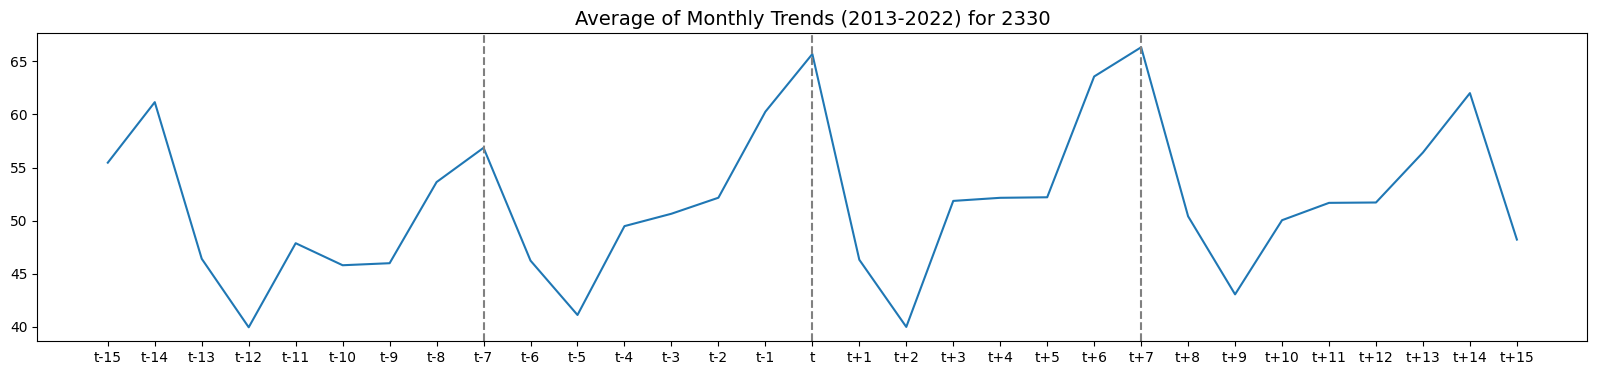

In [34]:
# Plot mean trends (2013 - 2022)
mt.plotCompanyMeanTrends(index)

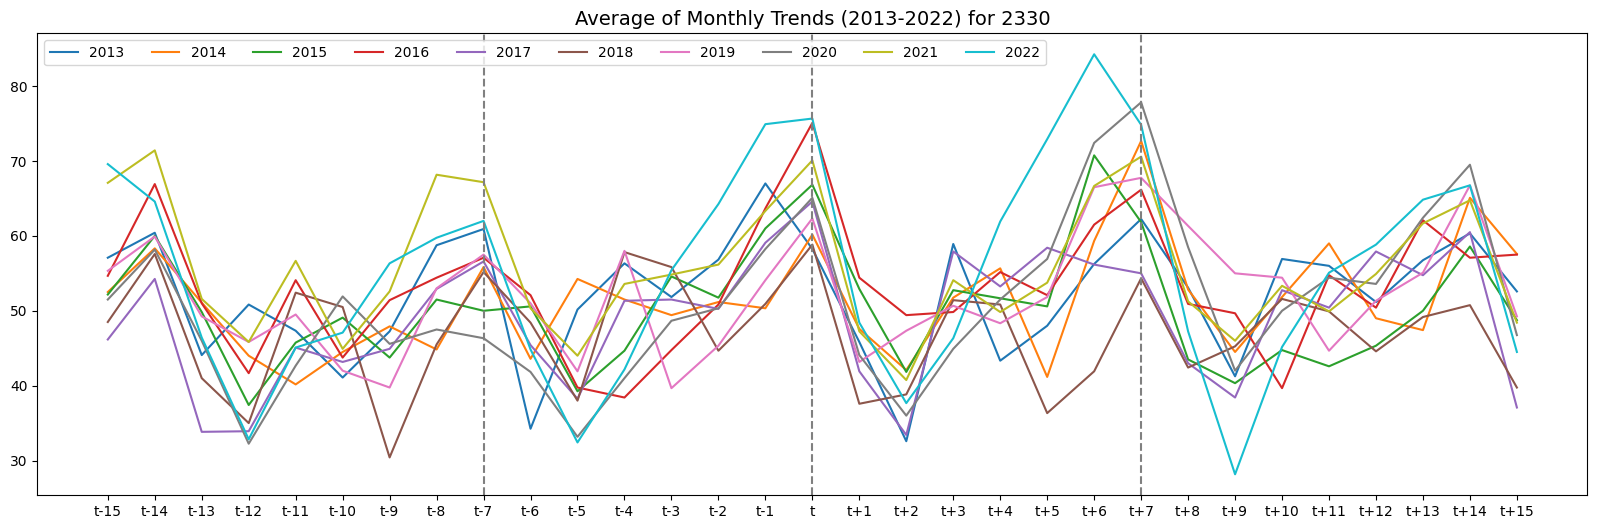

In [35]:
# Plot mean trends by year (2013 - 2022)
mt.plotCompanyMeanTrendsByYear(index)

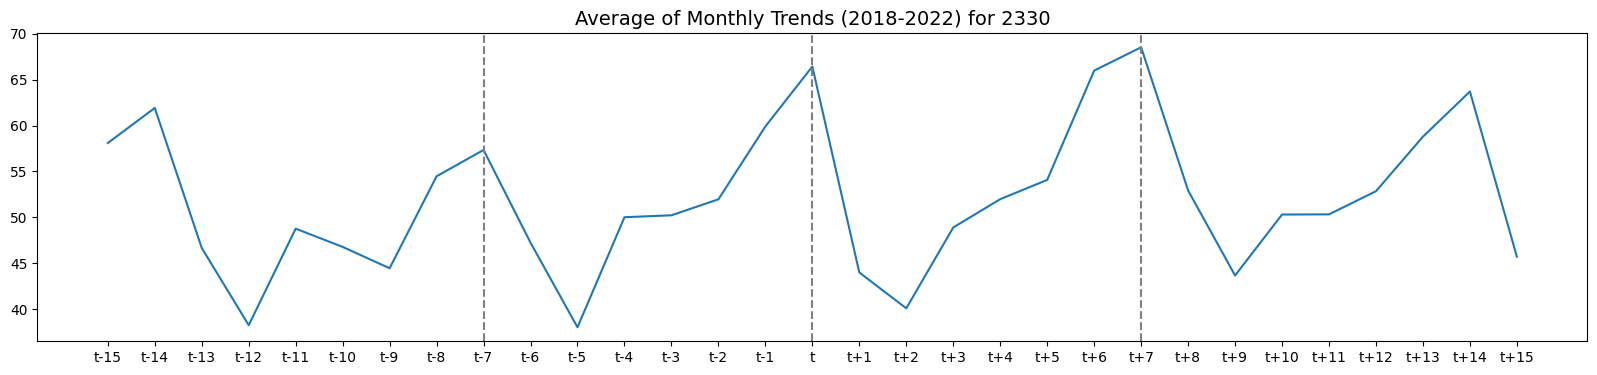

In [36]:
# Plot mean trends (2018 - 2022)
mt.plotCompanyMeanTrends(index, 2018)

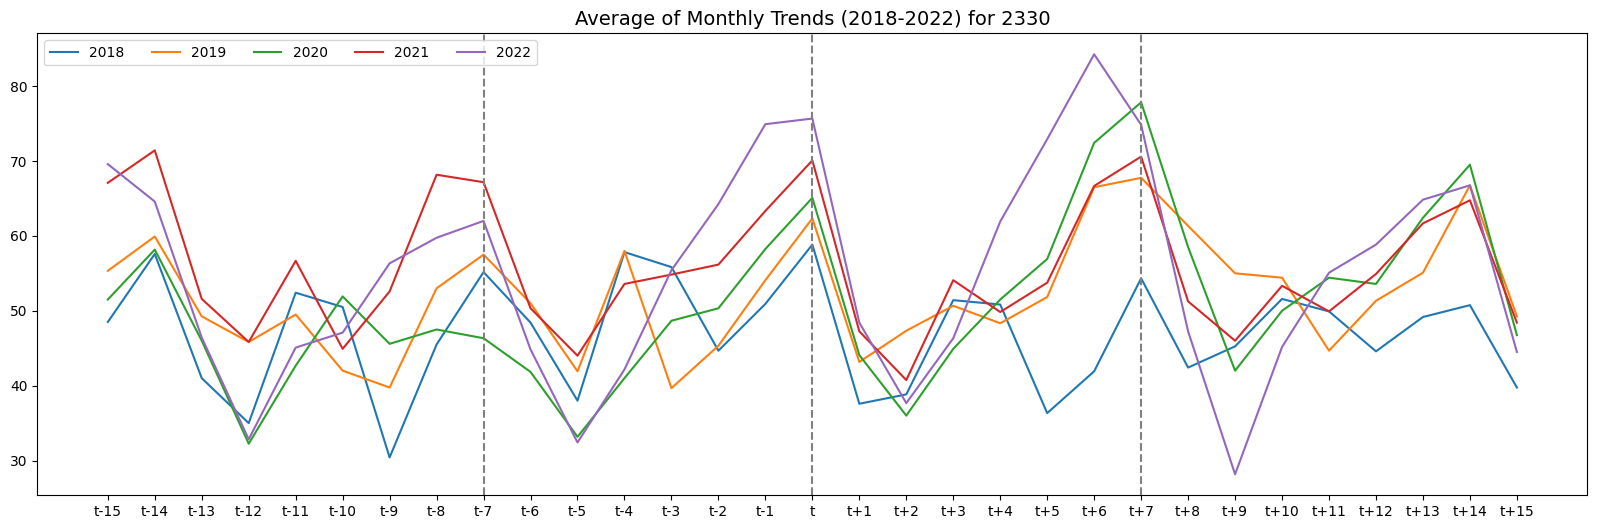

In [37]:
# Plot mean trends by year (2018 - 2022)
mt.plotCompanyMeanTrendsByYear(index, 2018)

#### **5.1.3 All the Companies**

In [24]:
mt = MonthlyTrends(company_list, 2013, 2022)

In [25]:
# Read all the trends data (8 min.)
all_company_trends = mt.readAllTrends()
print(len(all_company_trends))

Time spent: 315.533 sec.
1167


In [26]:
# Calculate mean trends by year
all_mean_trends = mt.calculateAllMeanByYear(all_company_trends)
all_mean_trends

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
t-15,18.986789,20.166881,21.679877,20.903385,22.918166,23.265638,24.989503,26.553628,28.795416,30.314053
t-14,19.125964,20.625393,22.457298,21.463225,23.568980,24.454584,26.434662,28.054770,30.859612,31.462225
t-13,19.022137,20.019851,20.988360,21.030134,22.492288,23.362611,24.986290,25.847472,28.189303,28.763782
t-12,18.442659,20.016210,20.924165,20.511711,21.888817,22.459654,23.998929,24.465438,26.837261,27.062339
t-11,18.916310,19.917452,20.988218,20.643316,22.231505,23.531063,23.912311,24.756570,27.786704,28.056127
t-10,19.091402,19.755141,20.743002,20.478006,21.666952,23.199157,23.742217,24.981220,26.786133,27.846330
t-9,18.954584,20.163168,20.787846,20.301128,22.244073,22.223151,22.730648,25.331762,26.674307,28.129249
t-8,19.165239,19.904456,21.444873,21.232362,22.573479,23.102685,23.800271,26.570480,28.181662,28.710726
t-7,19.418095,20.467938,22.095187,21.660740,22.591188,23.970009,24.848543,27.152028,29.709797,29.956798
t-6,19.020994,19.889532,21.071837,20.786133,22.409240,23.154956,23.550557,25.248786,27.904313,28.162739


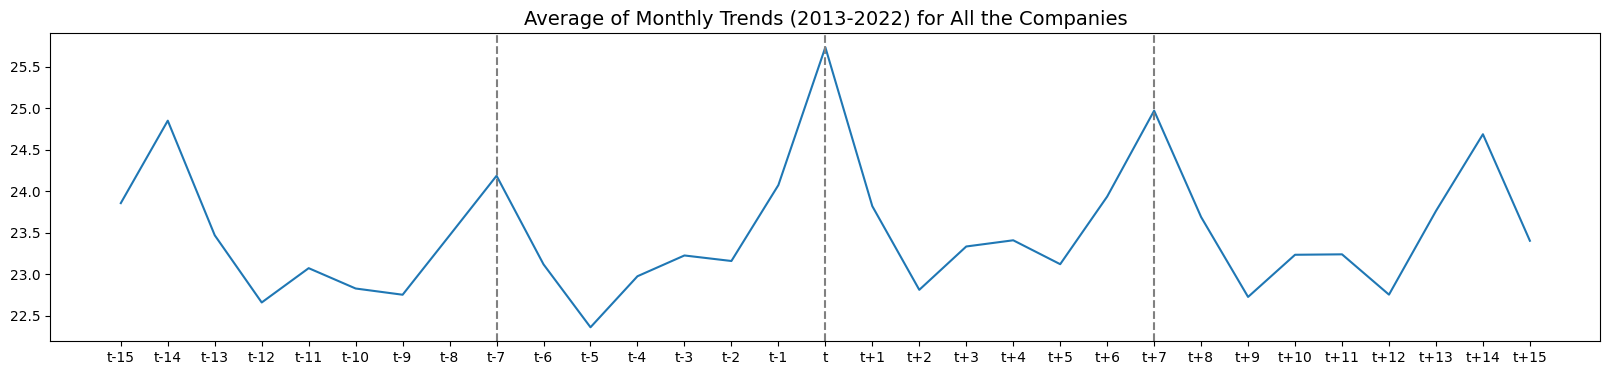

In [27]:
# Plot mean trends (2013 - 2022)
mt.plotAllMeanTrends(all_mean_trends)

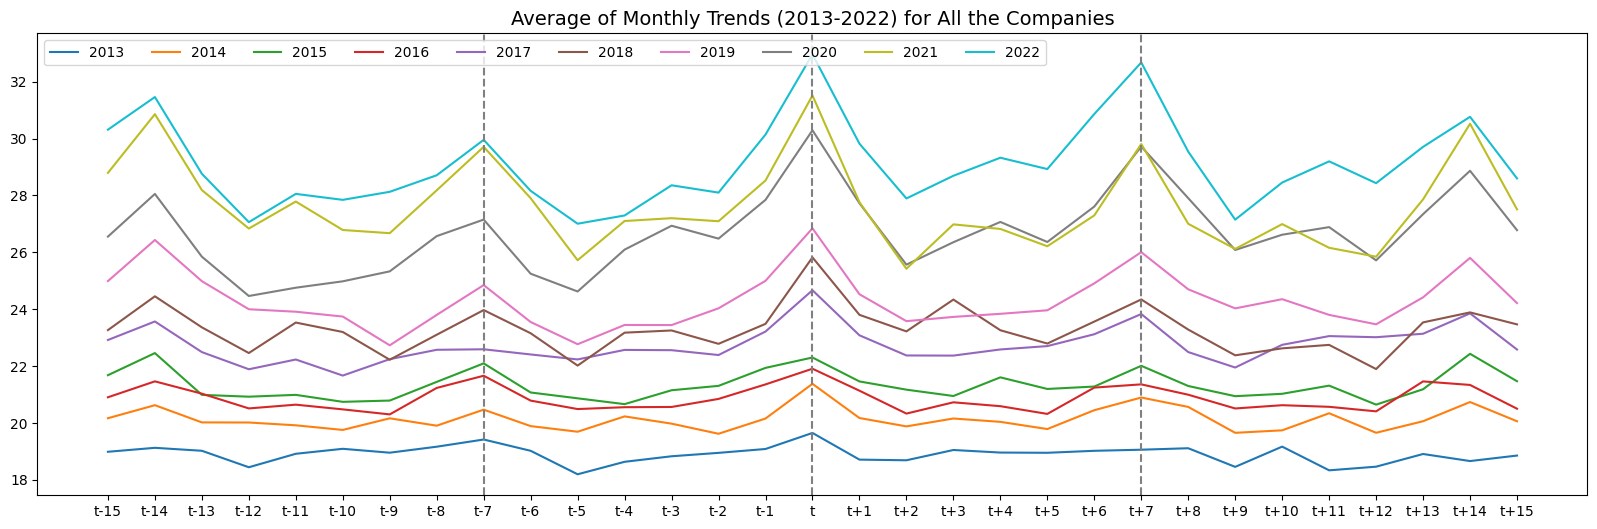

In [28]:
# Plot mean trends by year (2013 - 2022)
mt.plotAllMeanTrendsByYear(all_mean_trends)

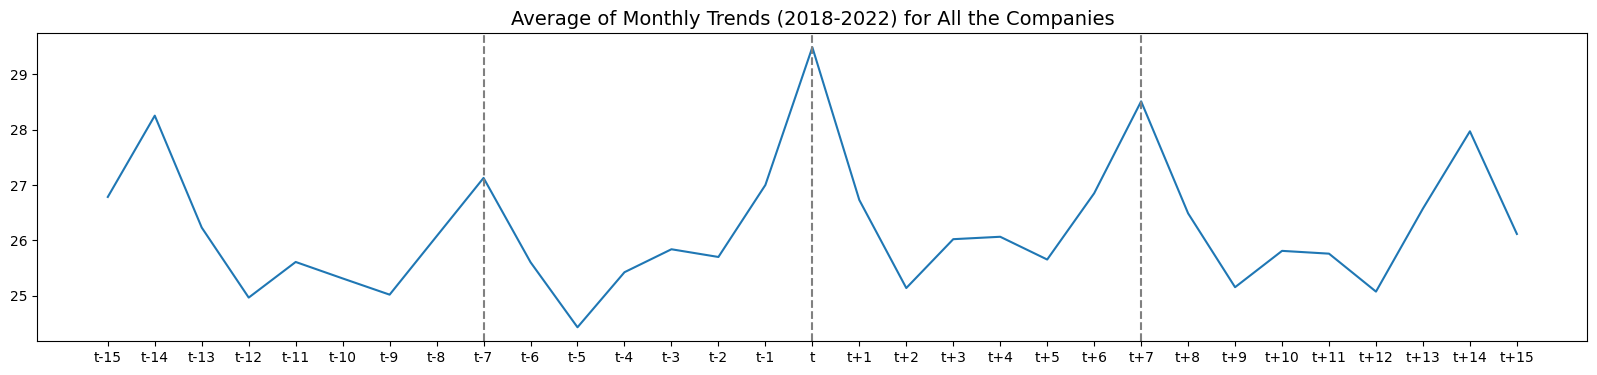

In [29]:
# Plot mean trends (2018 - 2022)
mt.plotAllMeanTrends(all_mean_trends, 2018)

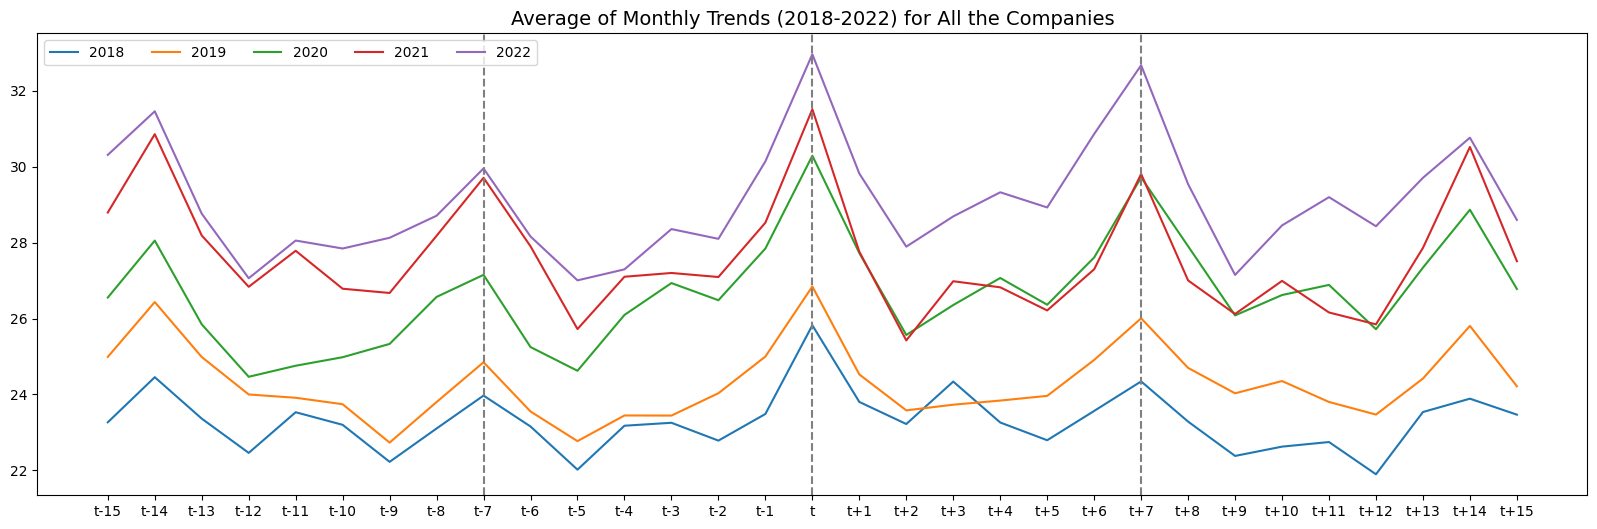

In [30]:
# Plot mean trends by year (2018 - 2022)
mt.plotAllMeanTrendsByYear(all_mean_trends, 2018)